# Introduction aux réseaux de reurones artificiels

CSI 4106 - Automne 2024

Marcel Turcotte  
Version: oct. 15, 2024 16h04

# Préambule

## Citation du Jour

Le [Prix Nobel de Physique
2024](https://www.nobelprize.org/prizes/physics/2024/summary/) a été
décerné à [John J.
Hopfield](https://en.wikipedia.org/wiki/John_Hopfield) et [Geoffrey E.
Hinton](https://www.cs.toronto.edu/~hinton/) “pour leurs découvertes et
inventions fondamentales permettant l’apprentissage automatique avec des
réseaux de neurones artificiels”

## Objectifs d’apprentissage

-   **Expliquer** les perceptrons et MLPs : structure, fonction,
    histoire, et limitations.
-   **Décrire** les fonctions d’activation : leur rôle dans
    l’apprentissage de modèles complexes.
-   **Implémenter** un réseau de neurones à propagation avant avec Keras
    sur Fashion-MNIST.
-   **Interpréter** l’entraînement et les résultats des réseaux
    neuronaux : visualisation et mesures d’évaluation.
-   **Se familiariser** avec les frameworks d’apprentissage profond :
    PyTorch, TensorFlow et Keras pour la création et le déploiement de
    modèles.

Comme mentionné au début de ce cours, il existe deux grandes écoles de
pensée en intelligence artificielle : **l’IA symbolique** et le
**connexionnisme**. Alors que l’approche symbolique dominait
initialement le domaine, l’approche connexionniste est désormais la plus
répandue. Nous nous concentrerons désormais sur le **connexionnisme**.

# Introduction

## Réseaux neuronaux (NN)

Nous concentrons maintenant notre attention sur une famille de modèles
d’apprentissage automatique inspirés de la structure et du
fonctionnement des **réseaux neuronaux biologiques** présents chez les
animaux.

Aussi appelés **réseaux de neurones artificiels** ou **réseaux
neuronaux**, abrégés en ANN ou NN.

## Apprentissage automatique

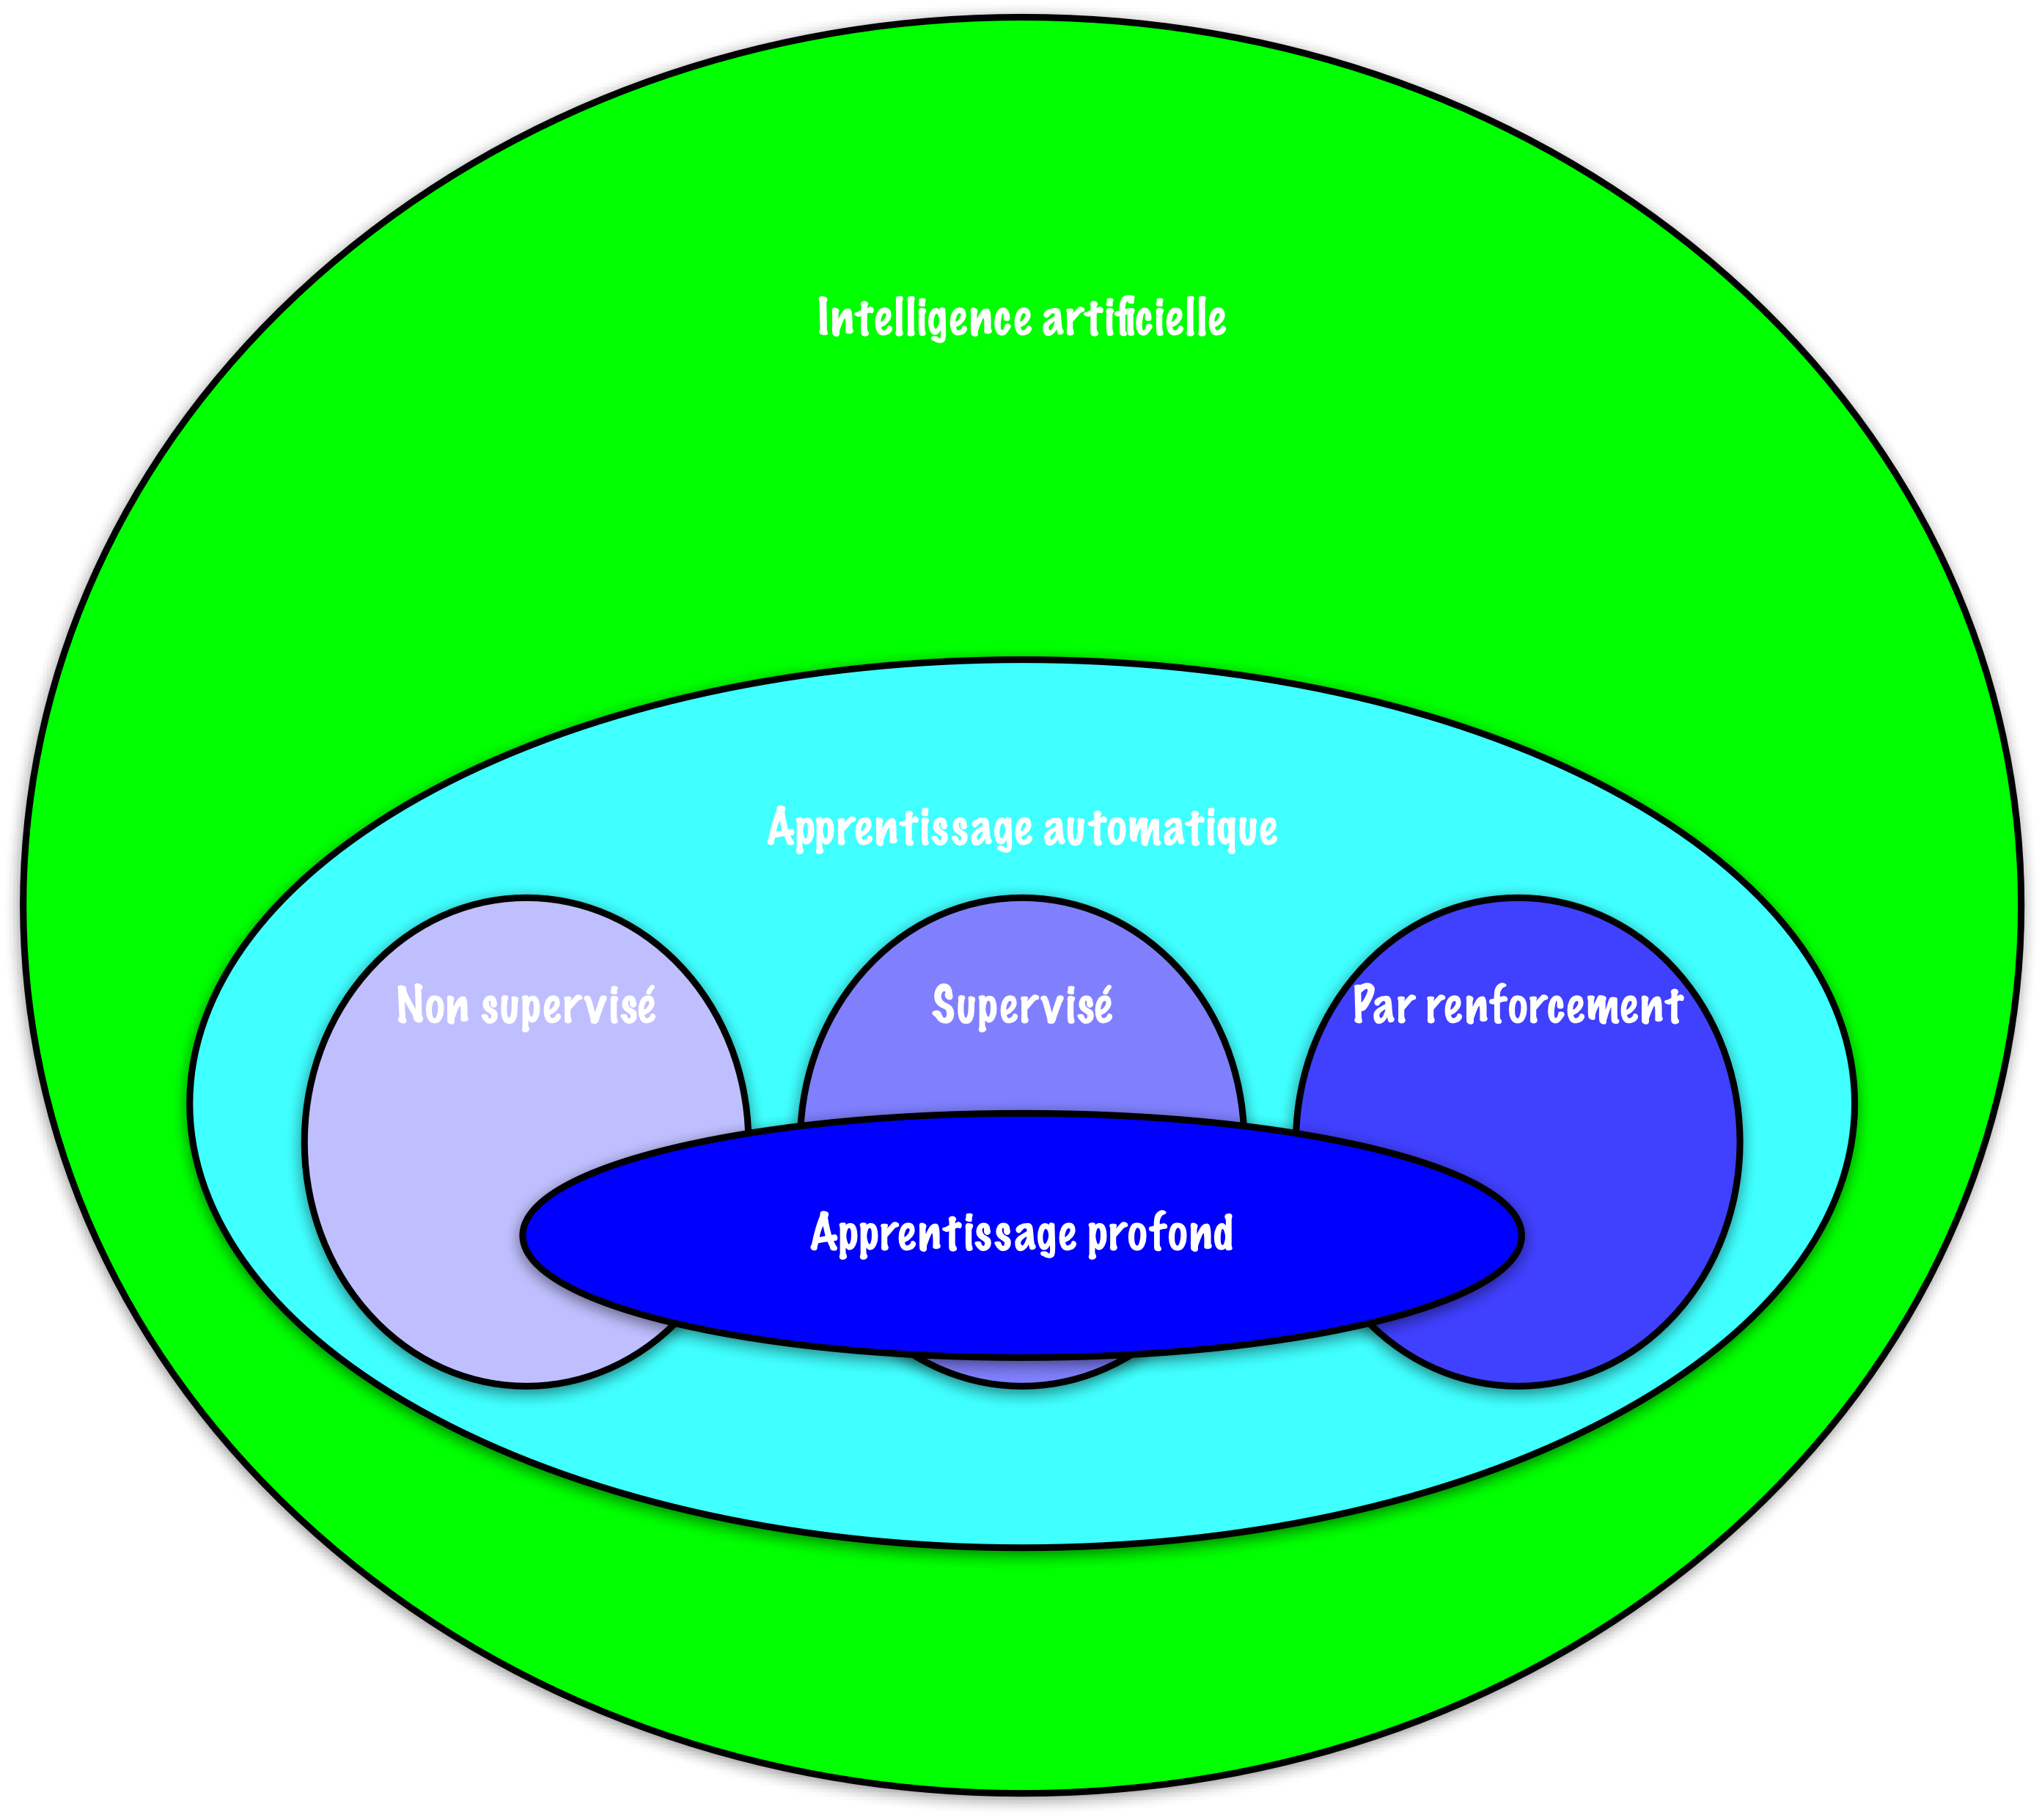

-   **Supervisé**: classification, régression

-   **Non supervisé**: autoencodeurs, auto-apprentissage
    (*self-supervised*)

-   **Par renforcement**: NN désormais un composant intégral

Nous commencerons notre exploration dans le cadre de l’apprentissage
supervisé.

## Un neurone

![](https://upload.wikimedia.org/wikipedia/commons/3/36/Components_of_neuron.jpg)

**Attribution :** Jennifer Walinga, [CC BY-SA
4.0](https://creativecommons.org/licenses/by-sa/4.0)

Dans l’étude de l’intelligence artificielle, il est logique de
s’inspirer de la forme d’intelligence la mieux comprise : le cerveau
humain. Le cerveau est composé d’un réseau complexe de neurones, formant
ensemble des réseaux neuronaux biologiques. Bien que chaque neurone
présente un comportement relativement simple, il est connecté à des
milliers d’autres neurones, contribuant à la fonctionnalité complexe de
ces réseaux.

Un neurone peut être conceptualisé comme une unité de calcul basique, et
la complexité de la fonction cérébrale découle de l’interconnexion de
ces unités.

Yann LeCun et d’autres chercheurs ont souvent noté que les réseaux de
neurones artificiels utilisés dans l’apprentissage automatique
ressemblent aux réseaux neuronaux biologiques de la même manière que les
ailes d’un avion ressemblent à celles d’un oiseau.

## Neurones interconnectés

<https://youtu.be/uDnHOUPRTYM>

**Attribution :** [Molecular Mechanism of Synaptic
Function](https://www.biointeractive.org/classroom-resources/molecular-mechanism-synaptic-function)
de l’Institut Médical Howard Hughes (HHMI). Publié sur YouTube le
15-11-2018.

En biologie, nous adoptons essentiellement le concept d’unités de calcul
simples interconnectées pour former un réseau qui effectue
collectivement des calculs complexes.

Bien que la recherche sur les réseaux neuronaux biologiques soit
indéniablement importante, le domaine des réseaux de neurones
artificiels n’a incorporé qu’un nombre limité de concepts clés issus de
cette recherche.

## Connexionniste

![](https://raw.githubusercontent.com/alexlenail/NN-SVG/master/example.svg)

**Attribution :** LeNail, (2019). NN-SVG : Schémas d’Architecture de
Réseau Neuronal Prêts à Publier. Journal of Open Source Software, 4(33),
747, https://doi.org/10.21105/joss.00747
([GitHub](https://github.com/alexlenail/NN-SVG))

Une autre caractéristique des réseaux neuronaux biologiques que nous
adoptons est l’organisation des neurones en couches, particulièrement
évidente dans le cortex cérébral.

Le terme “connexionnistes” provient de l’idée que les nœuds dans ces
modèles sont interconnectés. Au lieu d’être explicitement programmés,
ces modèles apprennent leur comportement par l’entraînement.
L’apprentissage profond est une approche connexionniste.

Les **réseaux neuronaux** (**NNs**) se composent de couches de **nœuds
interconnectés (neurones)**, chaque **connexion** ayant un **poids**
associé.

Les réseaux neuronaux traitent les données d’entrée à travers ces
connexions pondérées, et l’**apprentissage** se produit en **ajustant
les poids** en fonction des **erreurs** dans les **données
d’entraînement**.

## Hiérarchie des concepts

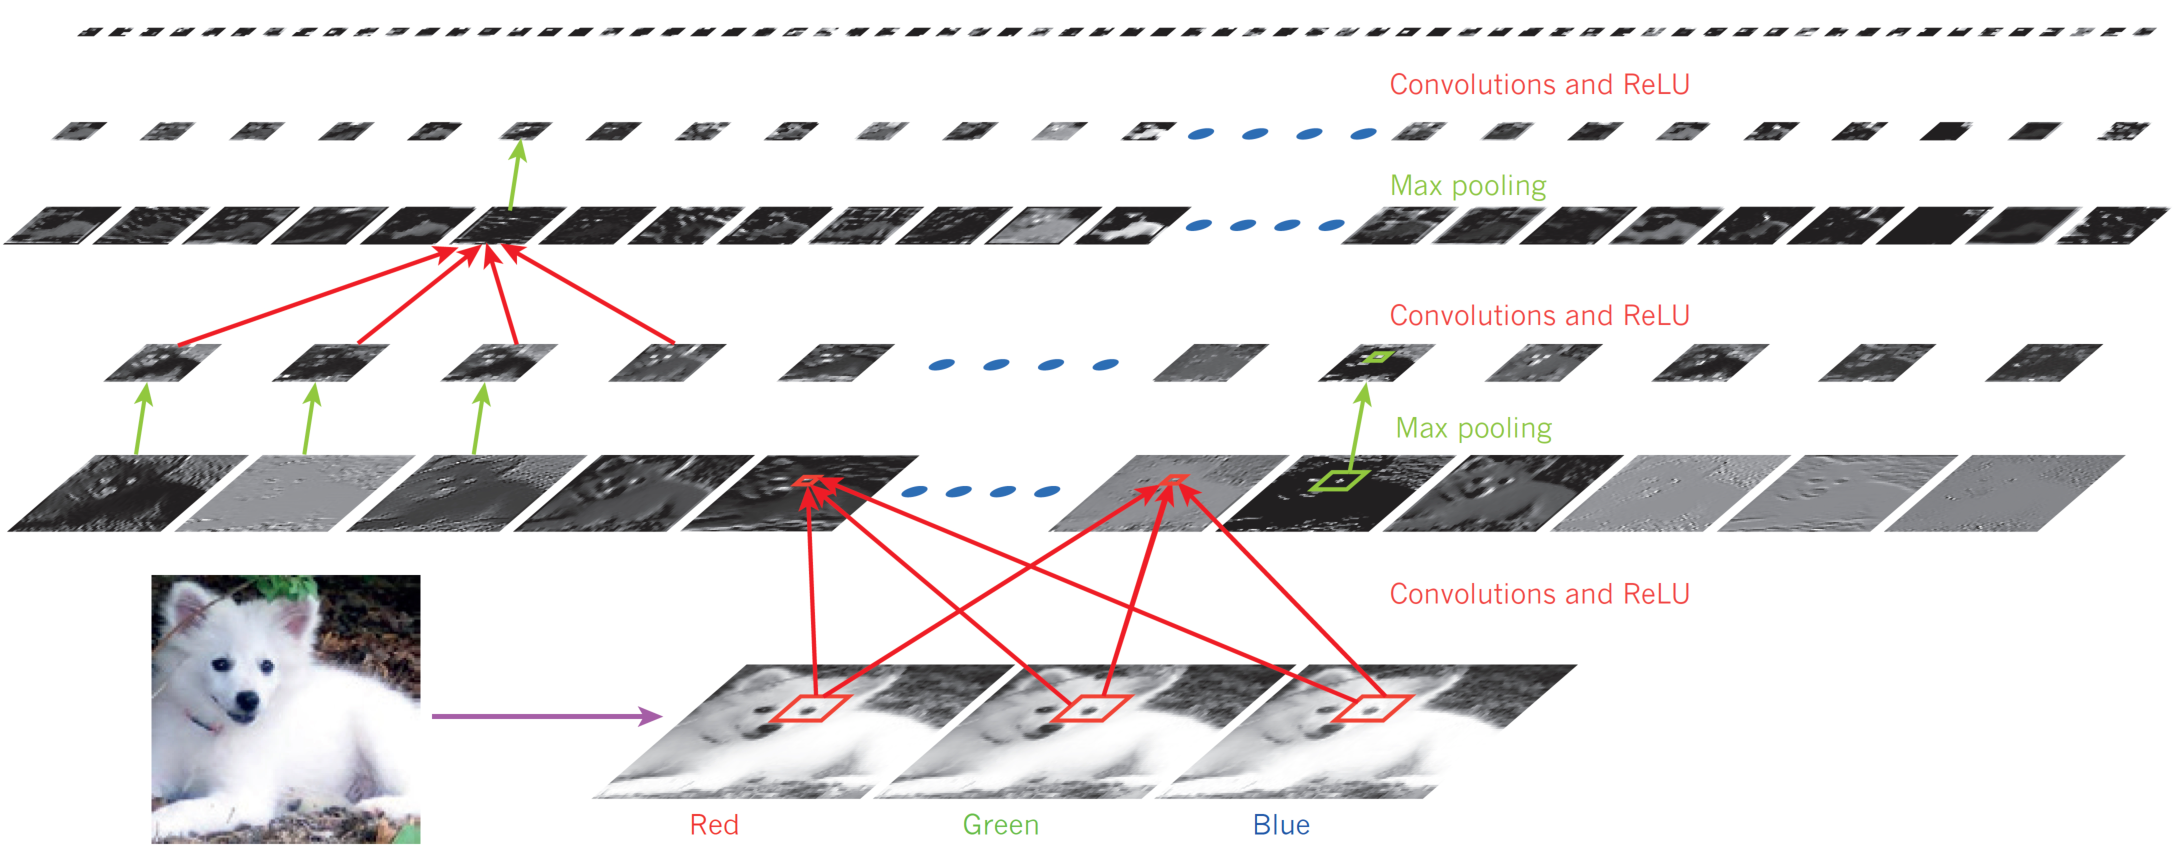

**Attribution :** LeCun, Bengio, et Hinton (2015)

Dans le livre “Deep Learning” (Goodfellow, Bengio, et Courville 2016),
les auteurs Goodfellow, Bengio et Courville définissent l’apprentissage
profond comme un sous-ensemble de l’apprentissage automatique qui permet
aux ordinateurs de “comprendre le monde en termes d’une hiérarchie de
concepts”.

Cette approche hiérarchique est l’une des contributions les plus
significatives de l’apprentissage profond. Elle réduit le besoin
d’ingénierie manuelle des attributs et réoriente l’attention vers
l’ingénierie des architectures de réseaux neuronaux.

# Notions de base

## Calculs avec neurodes

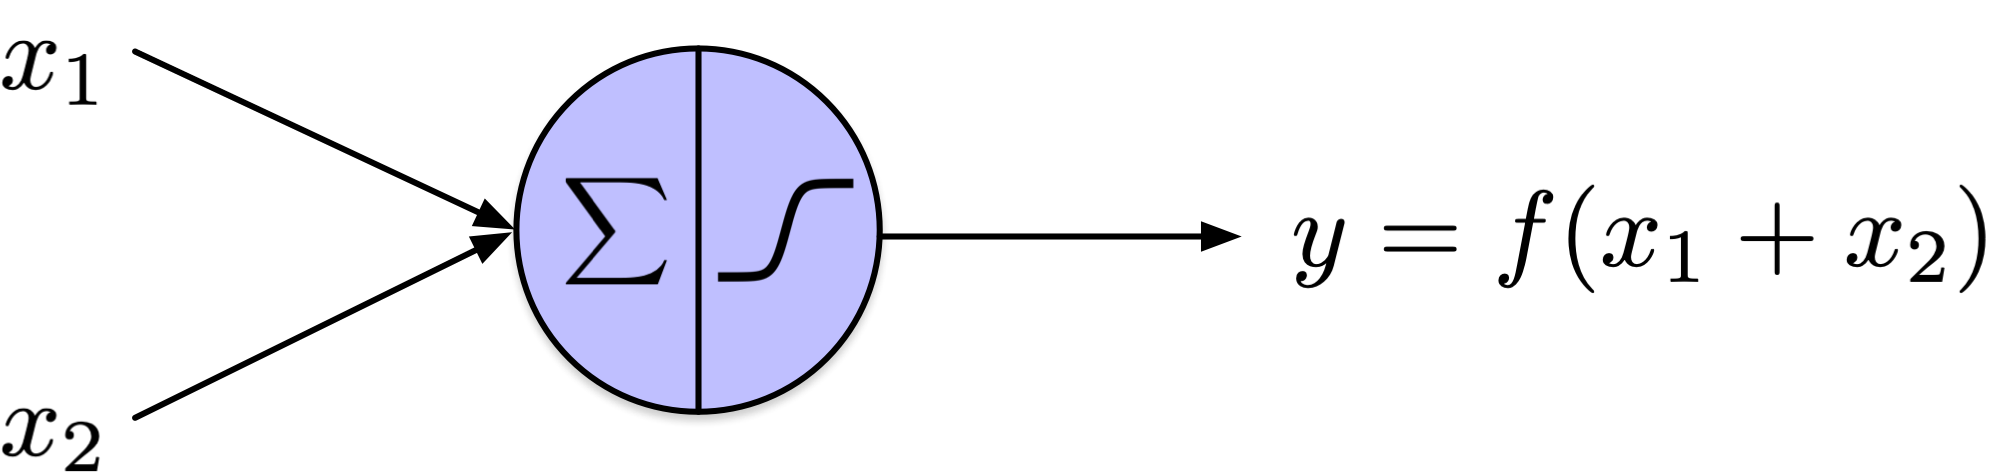

où $x_1, x_2 \in \{0,1\}$ et $f(z)$ est une **fonction indicatrice** :
$$
f(z)= \begin{cases}0, & z<\theta \\ 1, & z \geq \theta\end{cases}
$$

McCulloch et Pitts (1943) a nommé les neurones artificiels,
**neurodes**, pour **“neurone”** + **“nodes”** (“nœud”).

En mathématiques, $f(z)$, tel que défini ci-dessus, est connu sous le
nom de **fonction indicatrice** ou de **fonction caractéristique**.

Ces neurodes ont une ou plusieurs entrées binaires, prenant une valeur
de 0 ou 1, et une sortie binaire.

Ils ont montré que de telles unités pouvaient implémenter des fonctions
booléennes telles que **ET**, **OU**, et **NON**.

Mais aussi que les réseaux de telles unités peuvent calculer toute
proposition logique.

## Calculs avec neurodes

$$
y = f(x_1 + x_2)= \begin{cases}0, & x_1 + x_2 <\theta \\ 1, & x_1 + x_2 \geq \theta\end{cases}
$$

-   Avec $\theta = 2$, le neurode implémente une porte logique **ET**.

-   Avec $\theta = 1$, le neurode implémente une porte logique **OU**.

Une **logique plus complexe** peut être construite en multipliant les
entrées par **-1**, ce qui est interprété comme **inhibiteur**. Cela
permet notamment de construire une logique NON.

Avec $\theta = 1$, si $x_1 \in \{1\}$ et que $x_2$ est multiplié par
(-1), $y = 0$ lorsque $x_2 = 1$, et $y = 1$ lorsque $x_2 = 0$.

$$
y = f(x_1 + (-1) x_2)= \begin{cases}0, & x_1 + (-1) x_2 <\theta \\ 1, & x_1 + (-1) x_2 \geq \theta\end{cases}
$$

Les neurones peuvent être classés en deux grandes catégories :
**excitateur** et **inhibiteur**.

## Calculs avec neurodes

-   **Les calculs numériques** peuvent être décomposés en une **suite
    d’opérations logiques**, permettant aux réseaux de neurodes
    d’**exécuter tout calcul**.

-   McCulloch et Pitts (1943) ne se sont **pas concentrés sur
    l’apprentissage** du paramètre $\theta$.

-   Ils ont introduit une machine qui **calcule toute fonction**, mais
    **ne peut pas apprendre**.

De ces travaux, nous retenons l’idée que les réseaux de telles unités
effectuent des calculs. Le signal se propage d’un bout du réseau pour
produire un résultat.

## Unité logique à seuil

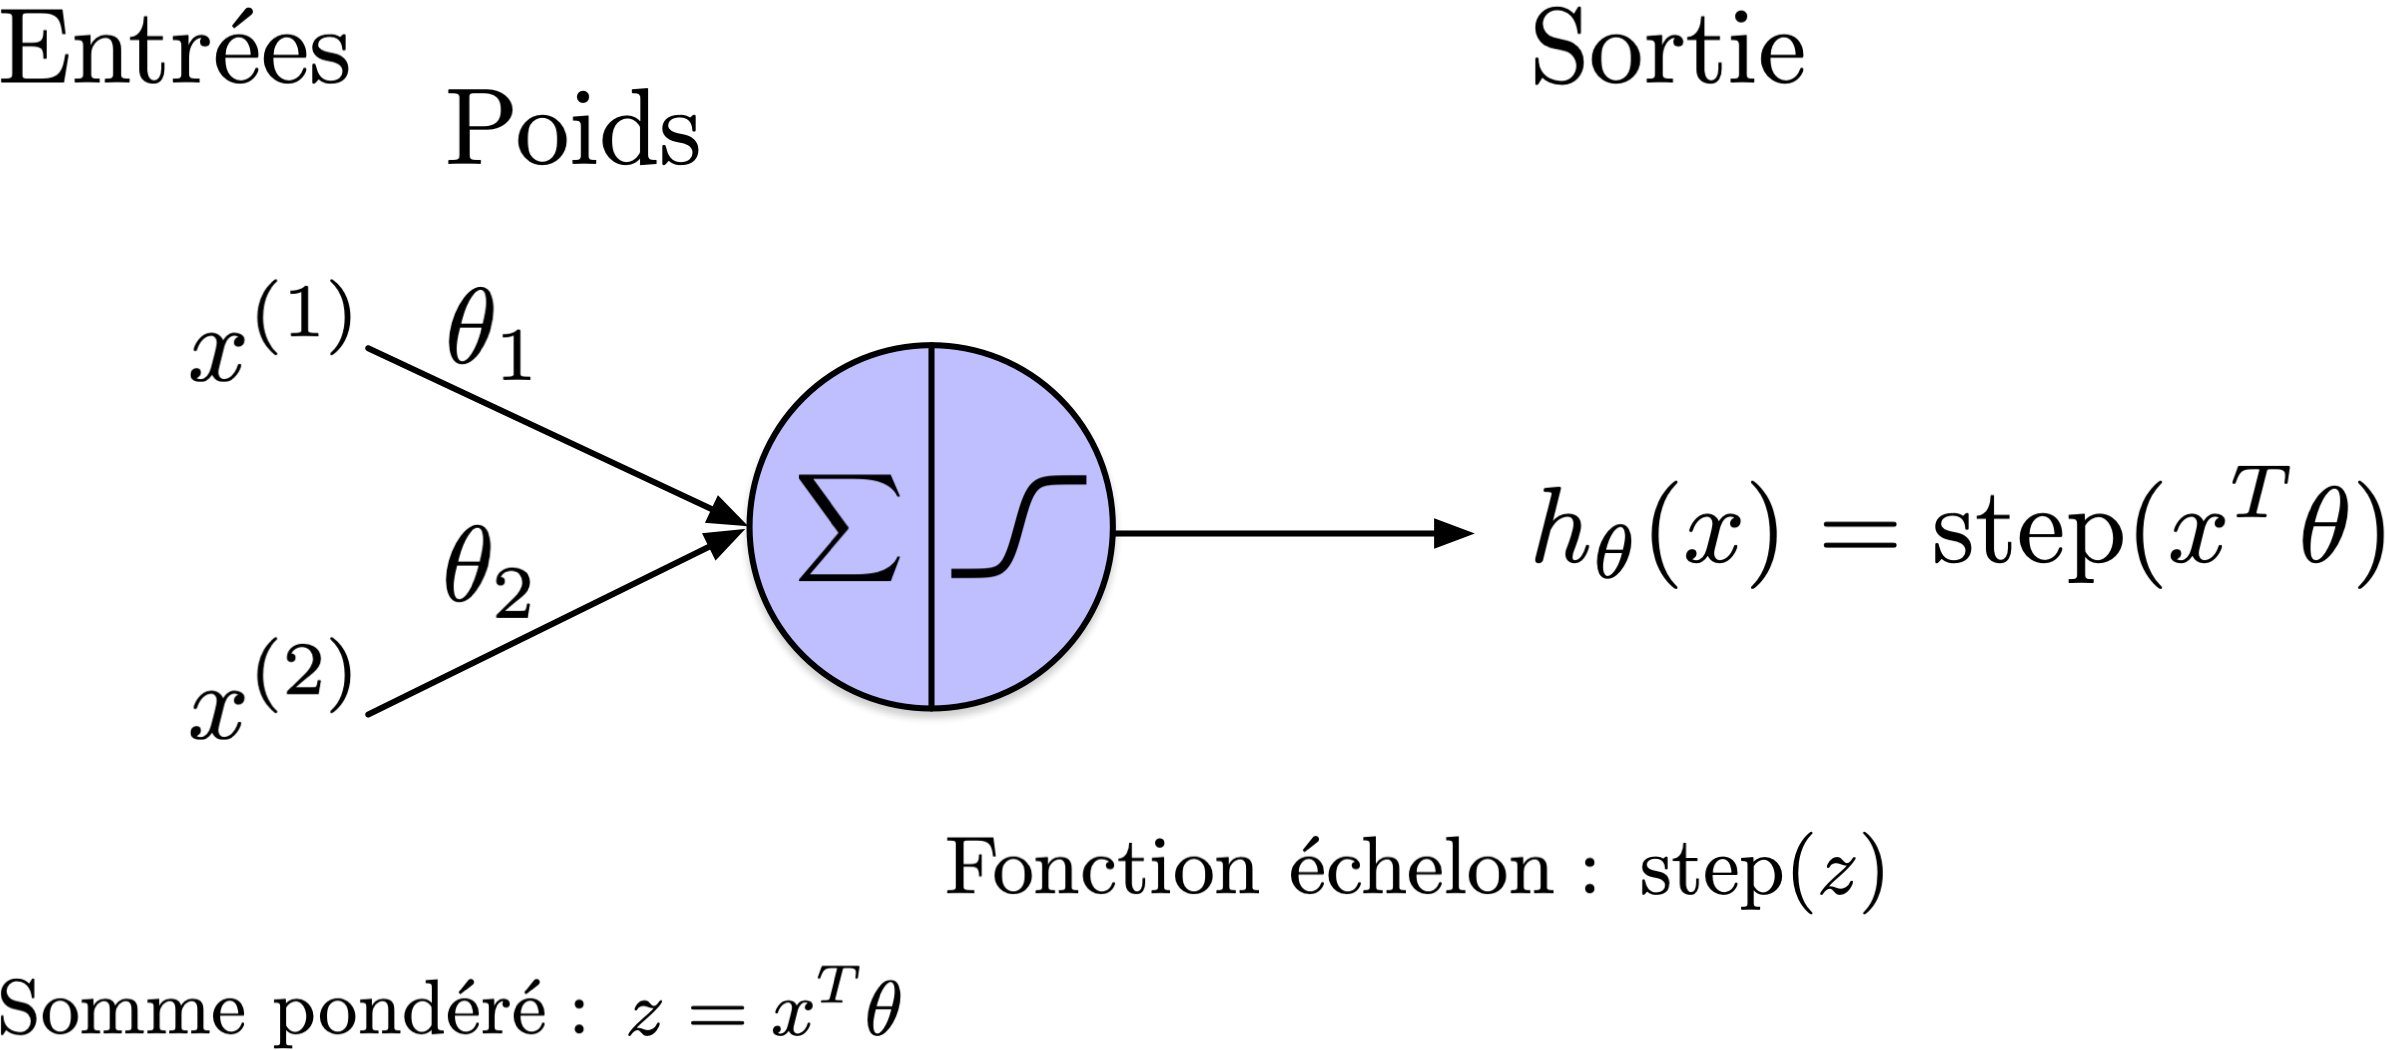

Rosenblatt (1958)

En 1957, Frank Rosenblatt a développé un modèle conceptuellement
distinct de neurone appelé **unité logique à seuil** (*threshold logic
unit*), qu’il a publié en 1958.

Dans ce modèle, les entrées et la sortie du neurone sont représentées
par des **valeurs réelles**. Notamment, chaque connexion d’entrée a un
poids associé.

La partie gauche du neurone, représentée par le symbole sigma,
représente le calcul d’une somme pondérée de ses entrées, exprimée comme
$\theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_D x_D + b$.

Cette somme est ensuite traitée par une fonction de seuil pour générer
la sortie.

Ici, $x^T \theta$ représente le produit scalaire de deux vecteurs : $x$
et $\theta$. $x^T$ désigne la transposée du vecteur $x$, le
convertissant d’un vecteur ligne à un vecteur colonne, permettant
l’opération du produit scalaire avec le vecteur $\theta$.

Le produit scalaire $x^T \theta$ est alors un scalaire donné par :

$$
x^T \theta = x^{(1)} \theta_1 + x^{(2)} \theta_2 + \cdots + x_{(D)} \theta_D
$$

où $x^{(j)}$ et $theta_j$ sont les composantes des vecteurs $x$ et
$\theta$, respectivement.

## Fonctions de seuil simples

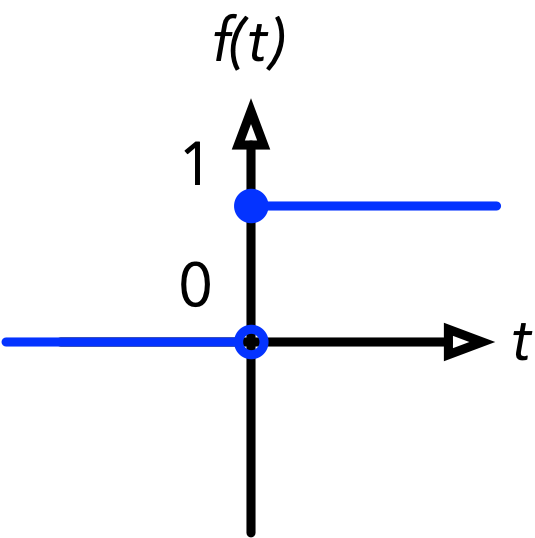

**$\text{heaviside}(t)$ =**

-   1, si $t \geq 0$

-   0, si $t < 0$

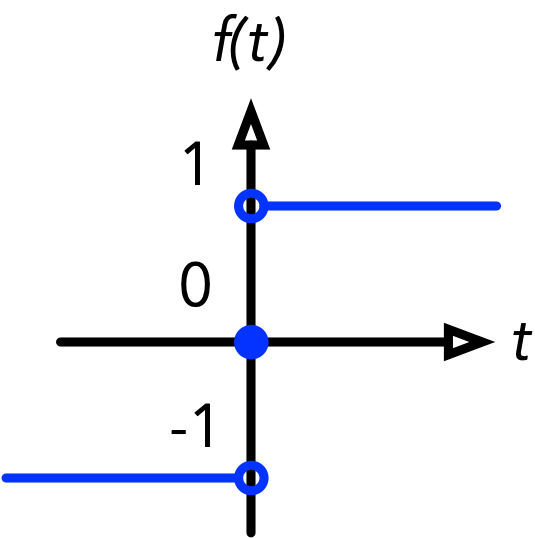

**$\text{sign}(t)$ =**

-   1, si $t > 0$

-   0, si $t = 0$

-   -1, si $t < 0$

Les **fonctions de seuil** courantes incluent la **fonction heaviside**
(0 si l’entrée est négative et 1 sinon) ou la fonction **sign** (-1 si
l’entrée est négative, 0 si l’entrée est égale à zéro, 1 sinon).

## Notation

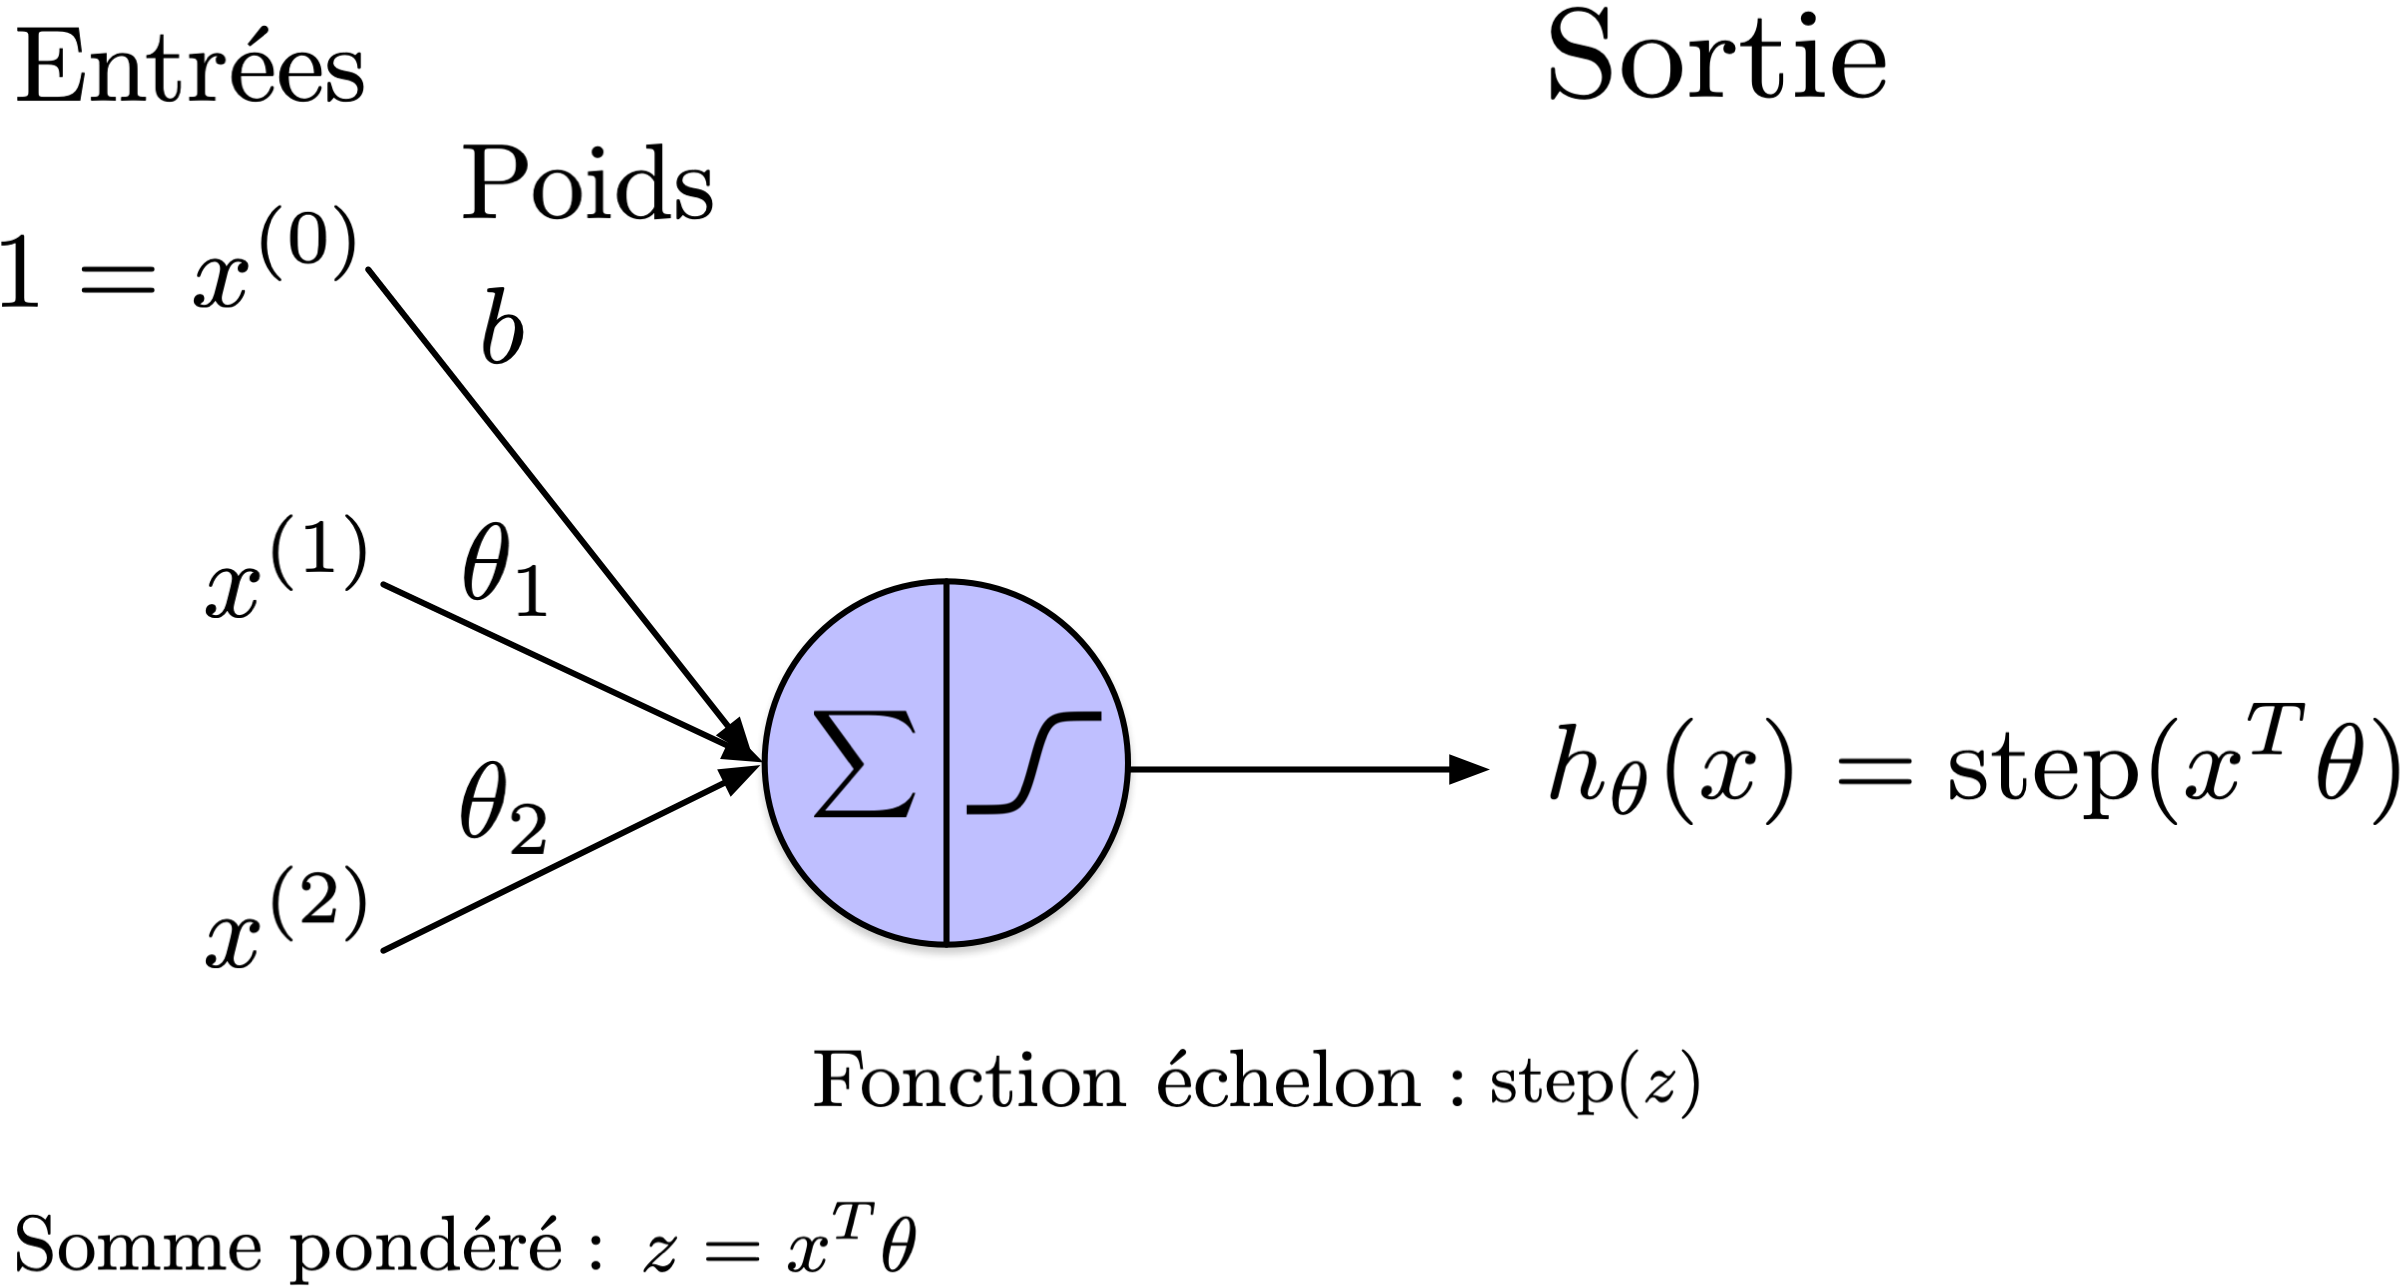

Ajoutez un attribut supplémentaire avec une valeur fixe de 1 à l’entrée.
Associez-la à un poids $b = \theta_{0}$, où $b$ est le
biais/interception.

## Notation

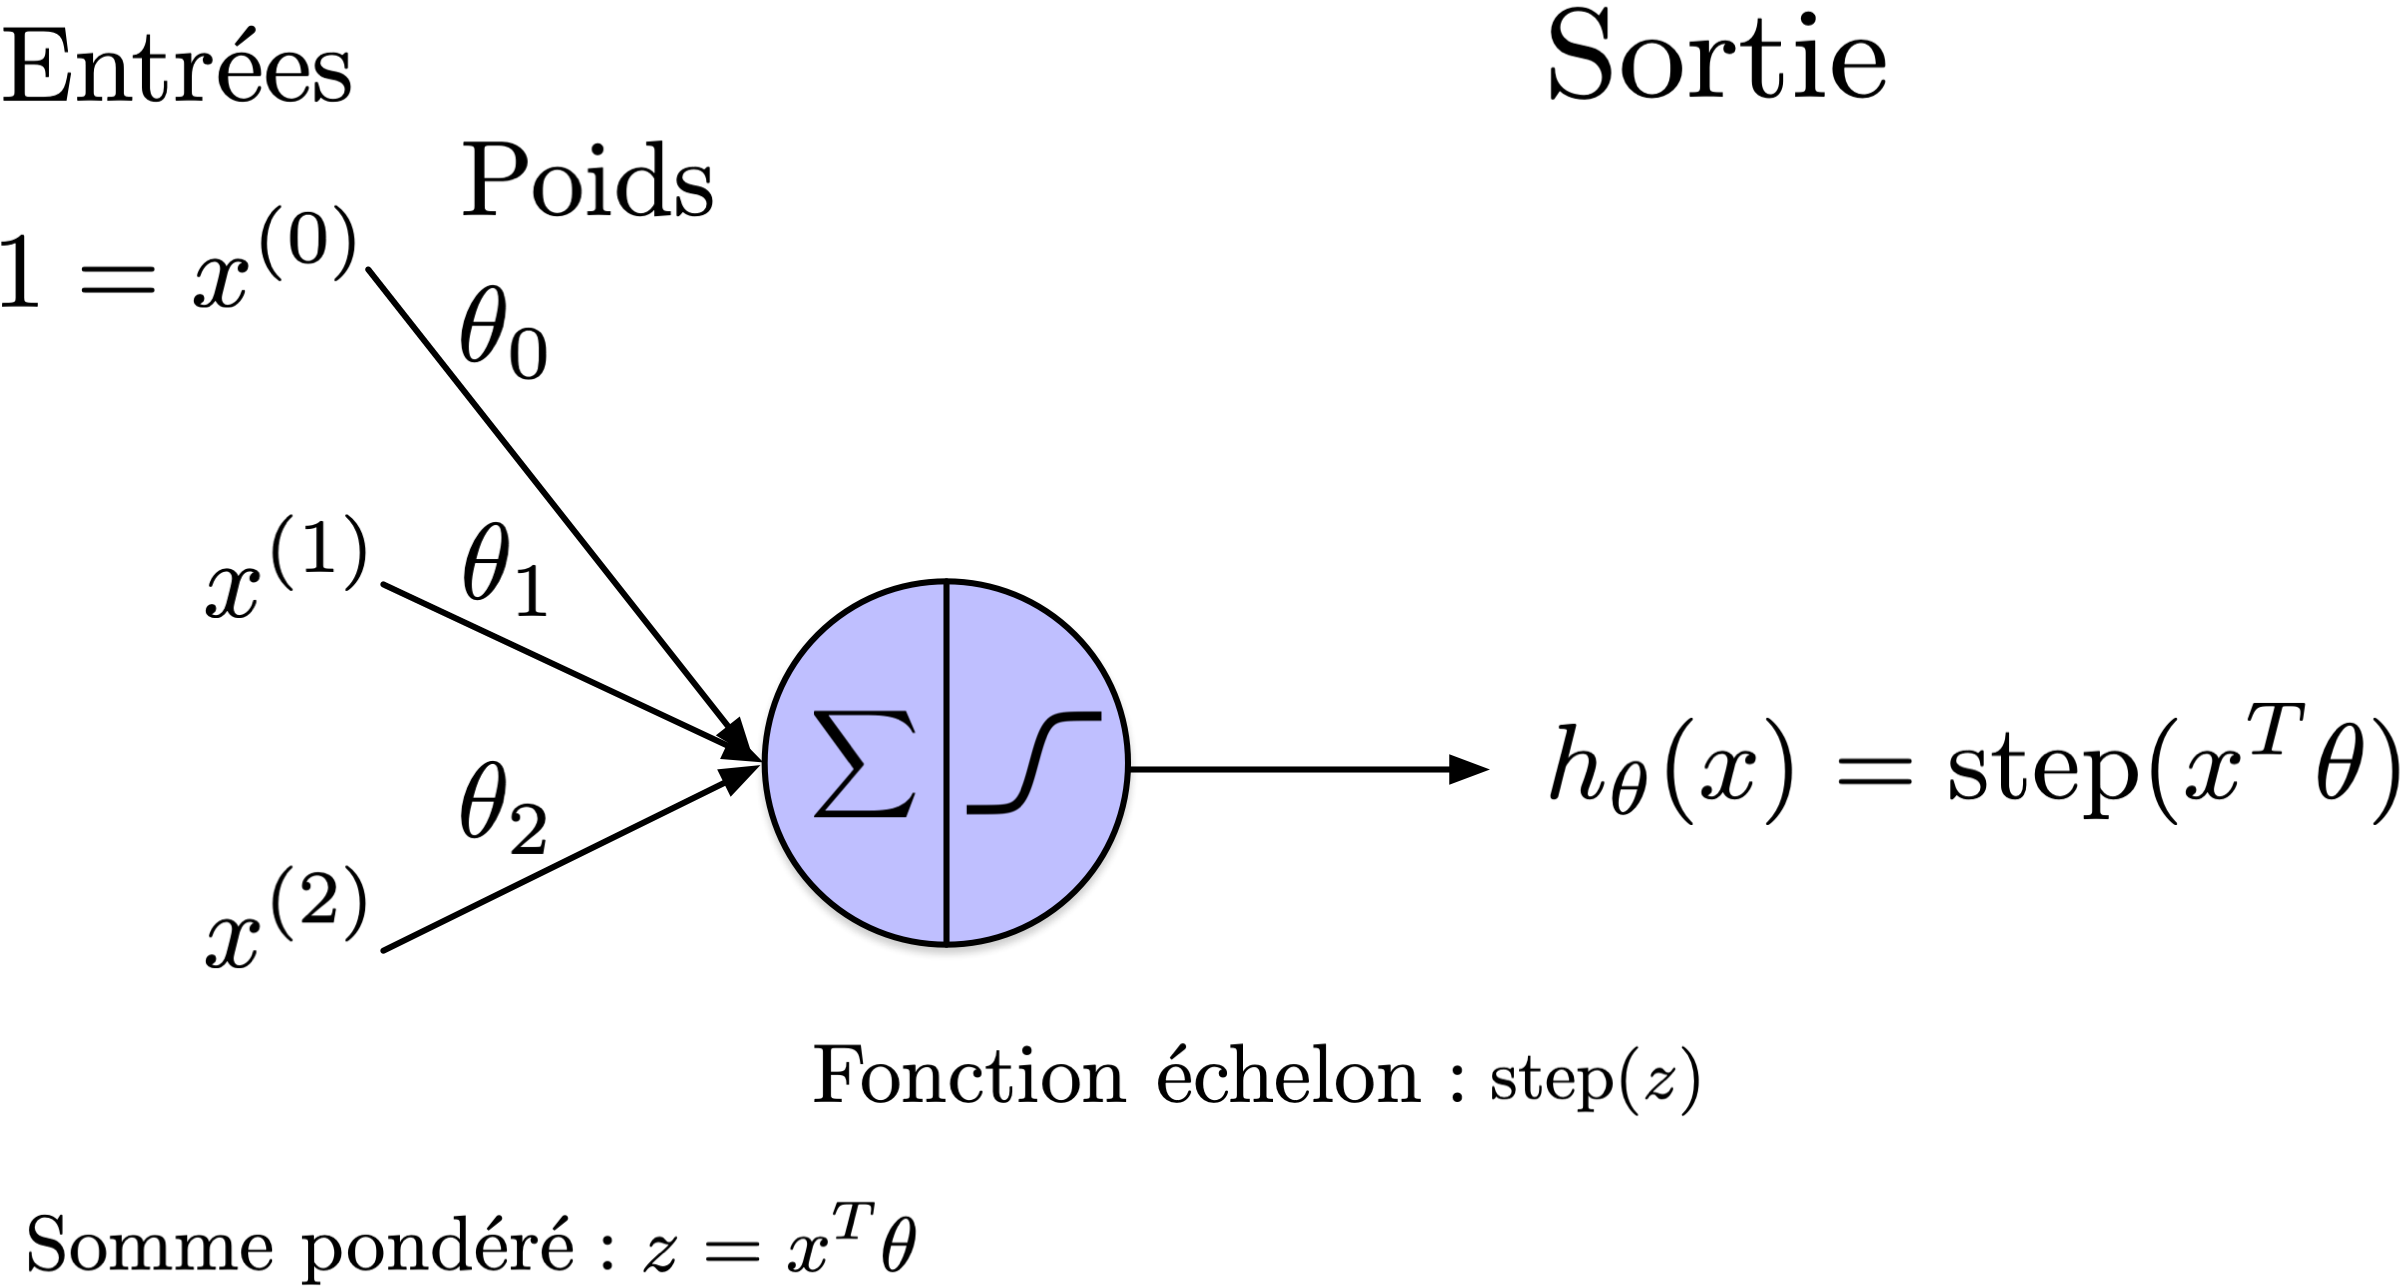

$\theta_{0} = b$ est le terme de biais/interception.

L’unité logique à seuil est analogue à la régression logistique, la
principale différence étant la substitution de la fonction logistique
(sigmoïde) par une fonction de seuil. Comme la régression logistique, le
perceptron est utilisé pour les tâches de classification.

## Perceptron

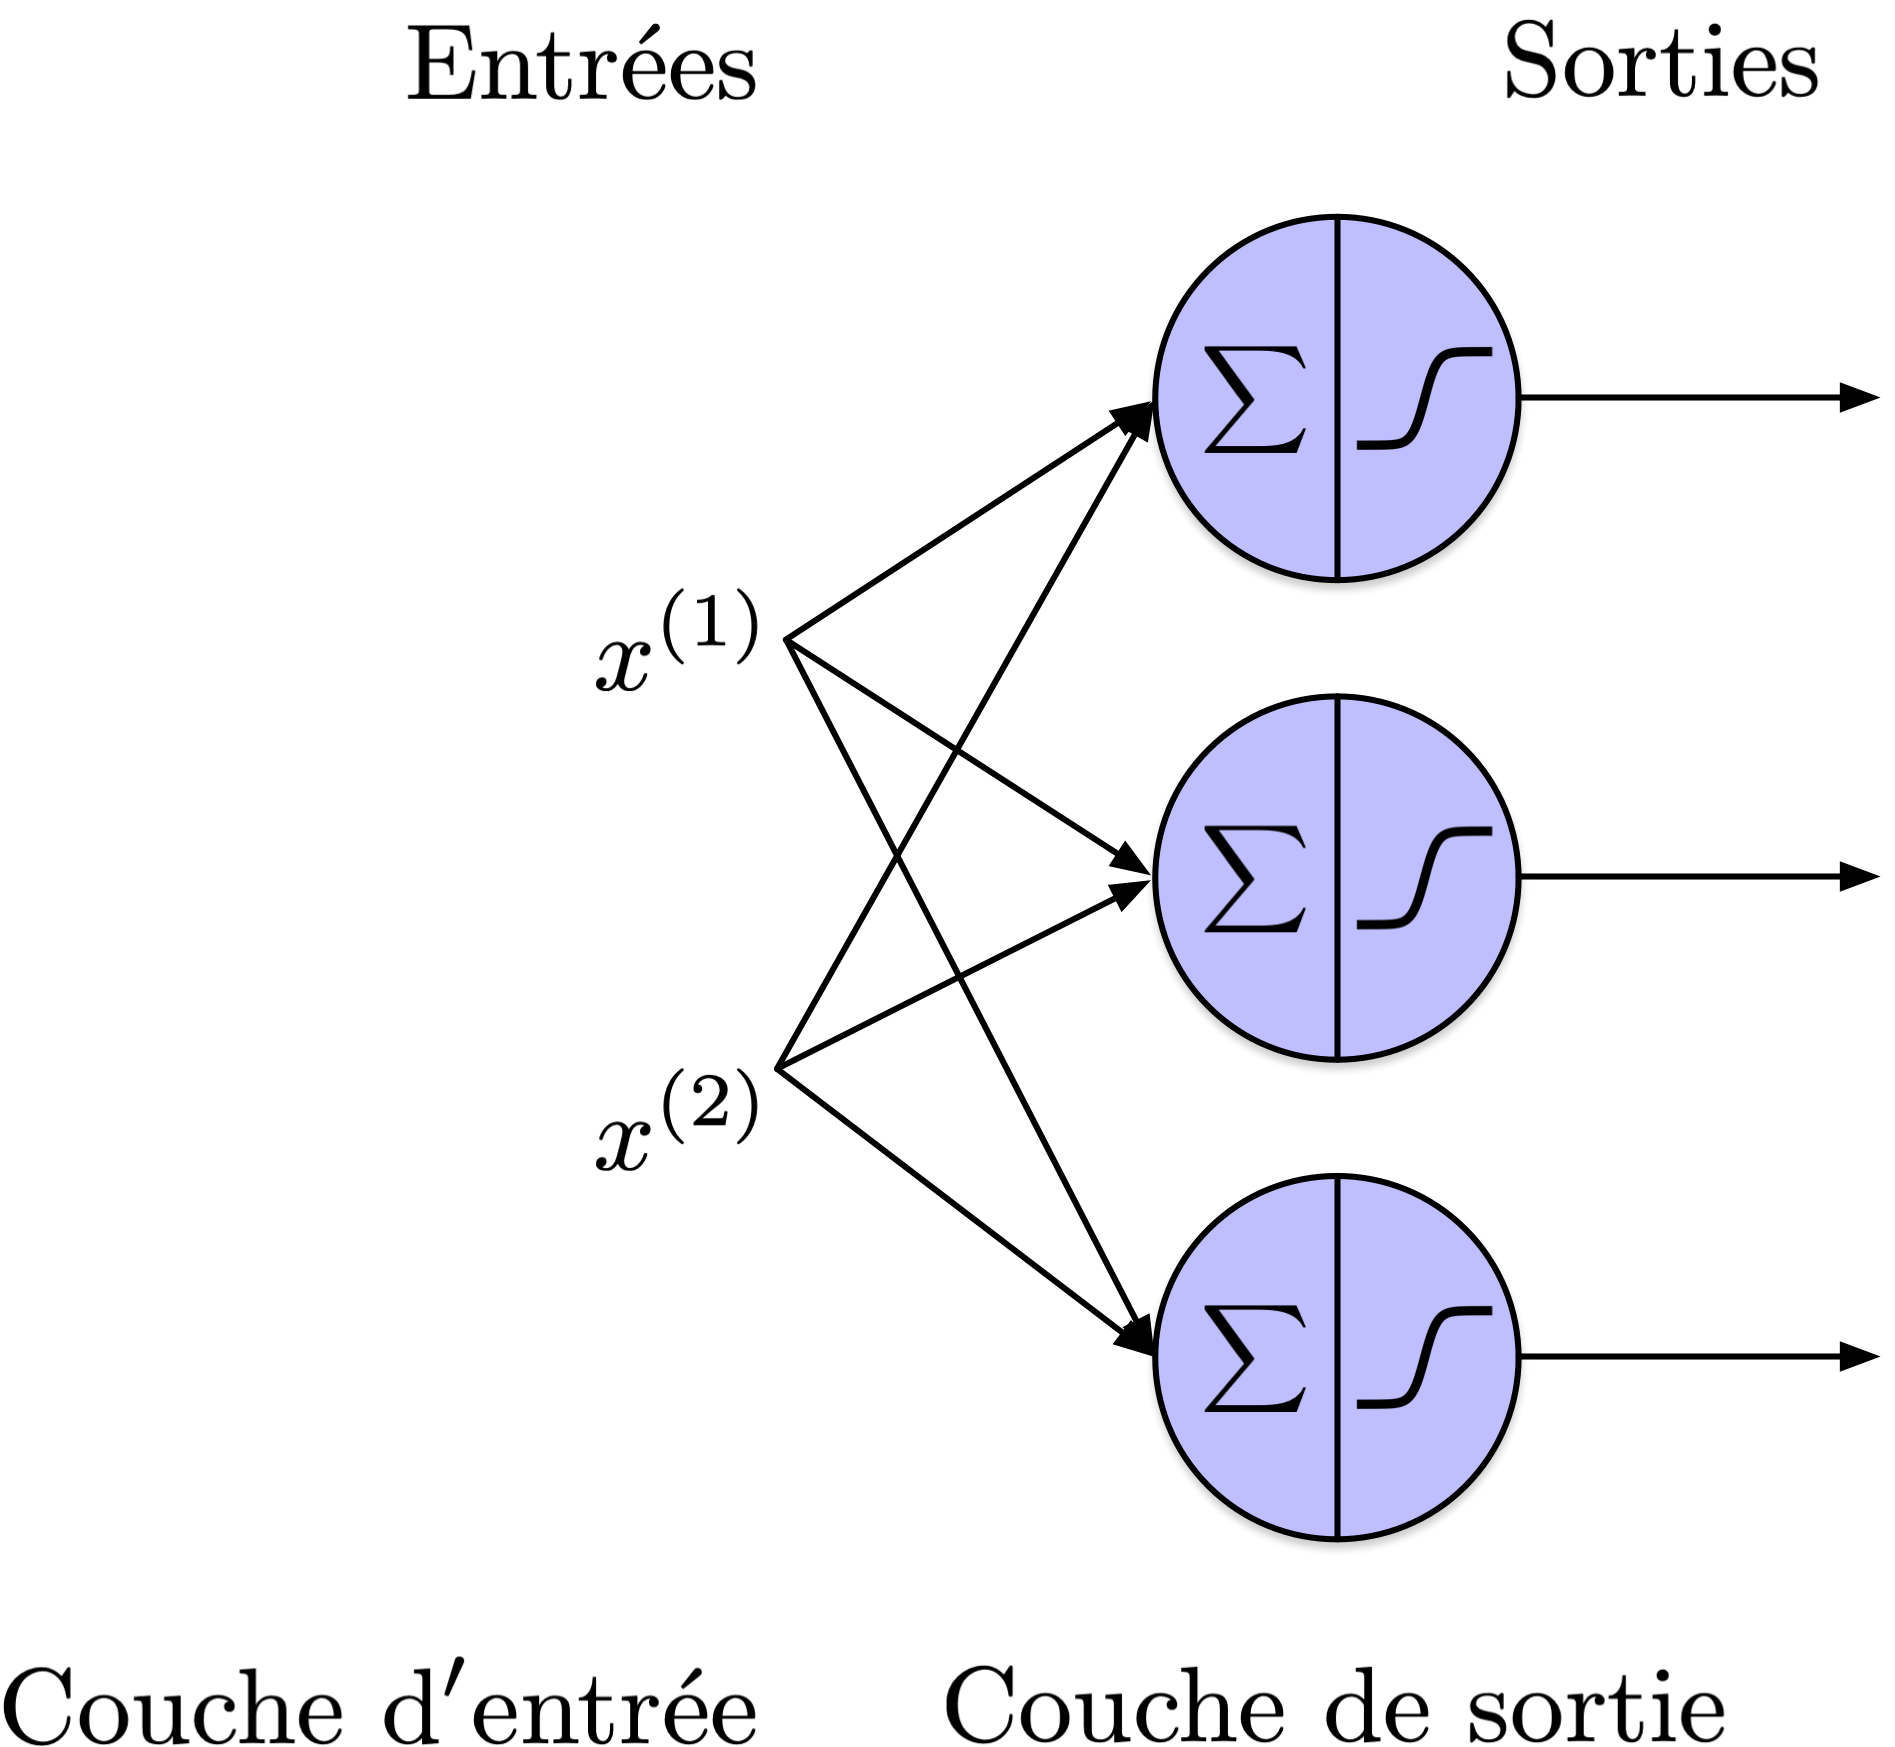

Un **perceptron** est constitué d’une ou plusieurs **unités logiques à
seuil** disposées en une **seule couche**, chaque unité étant connectée
à toutes les entrées. Cette configuration est appelée **complètement
connectée** (*fully connected*) ou **dense**.

Puisque les unités logiques à seuil dans cette couche unique génèrent
également la sortie, on l’appelle **couche de sortie**.

## Perceptron

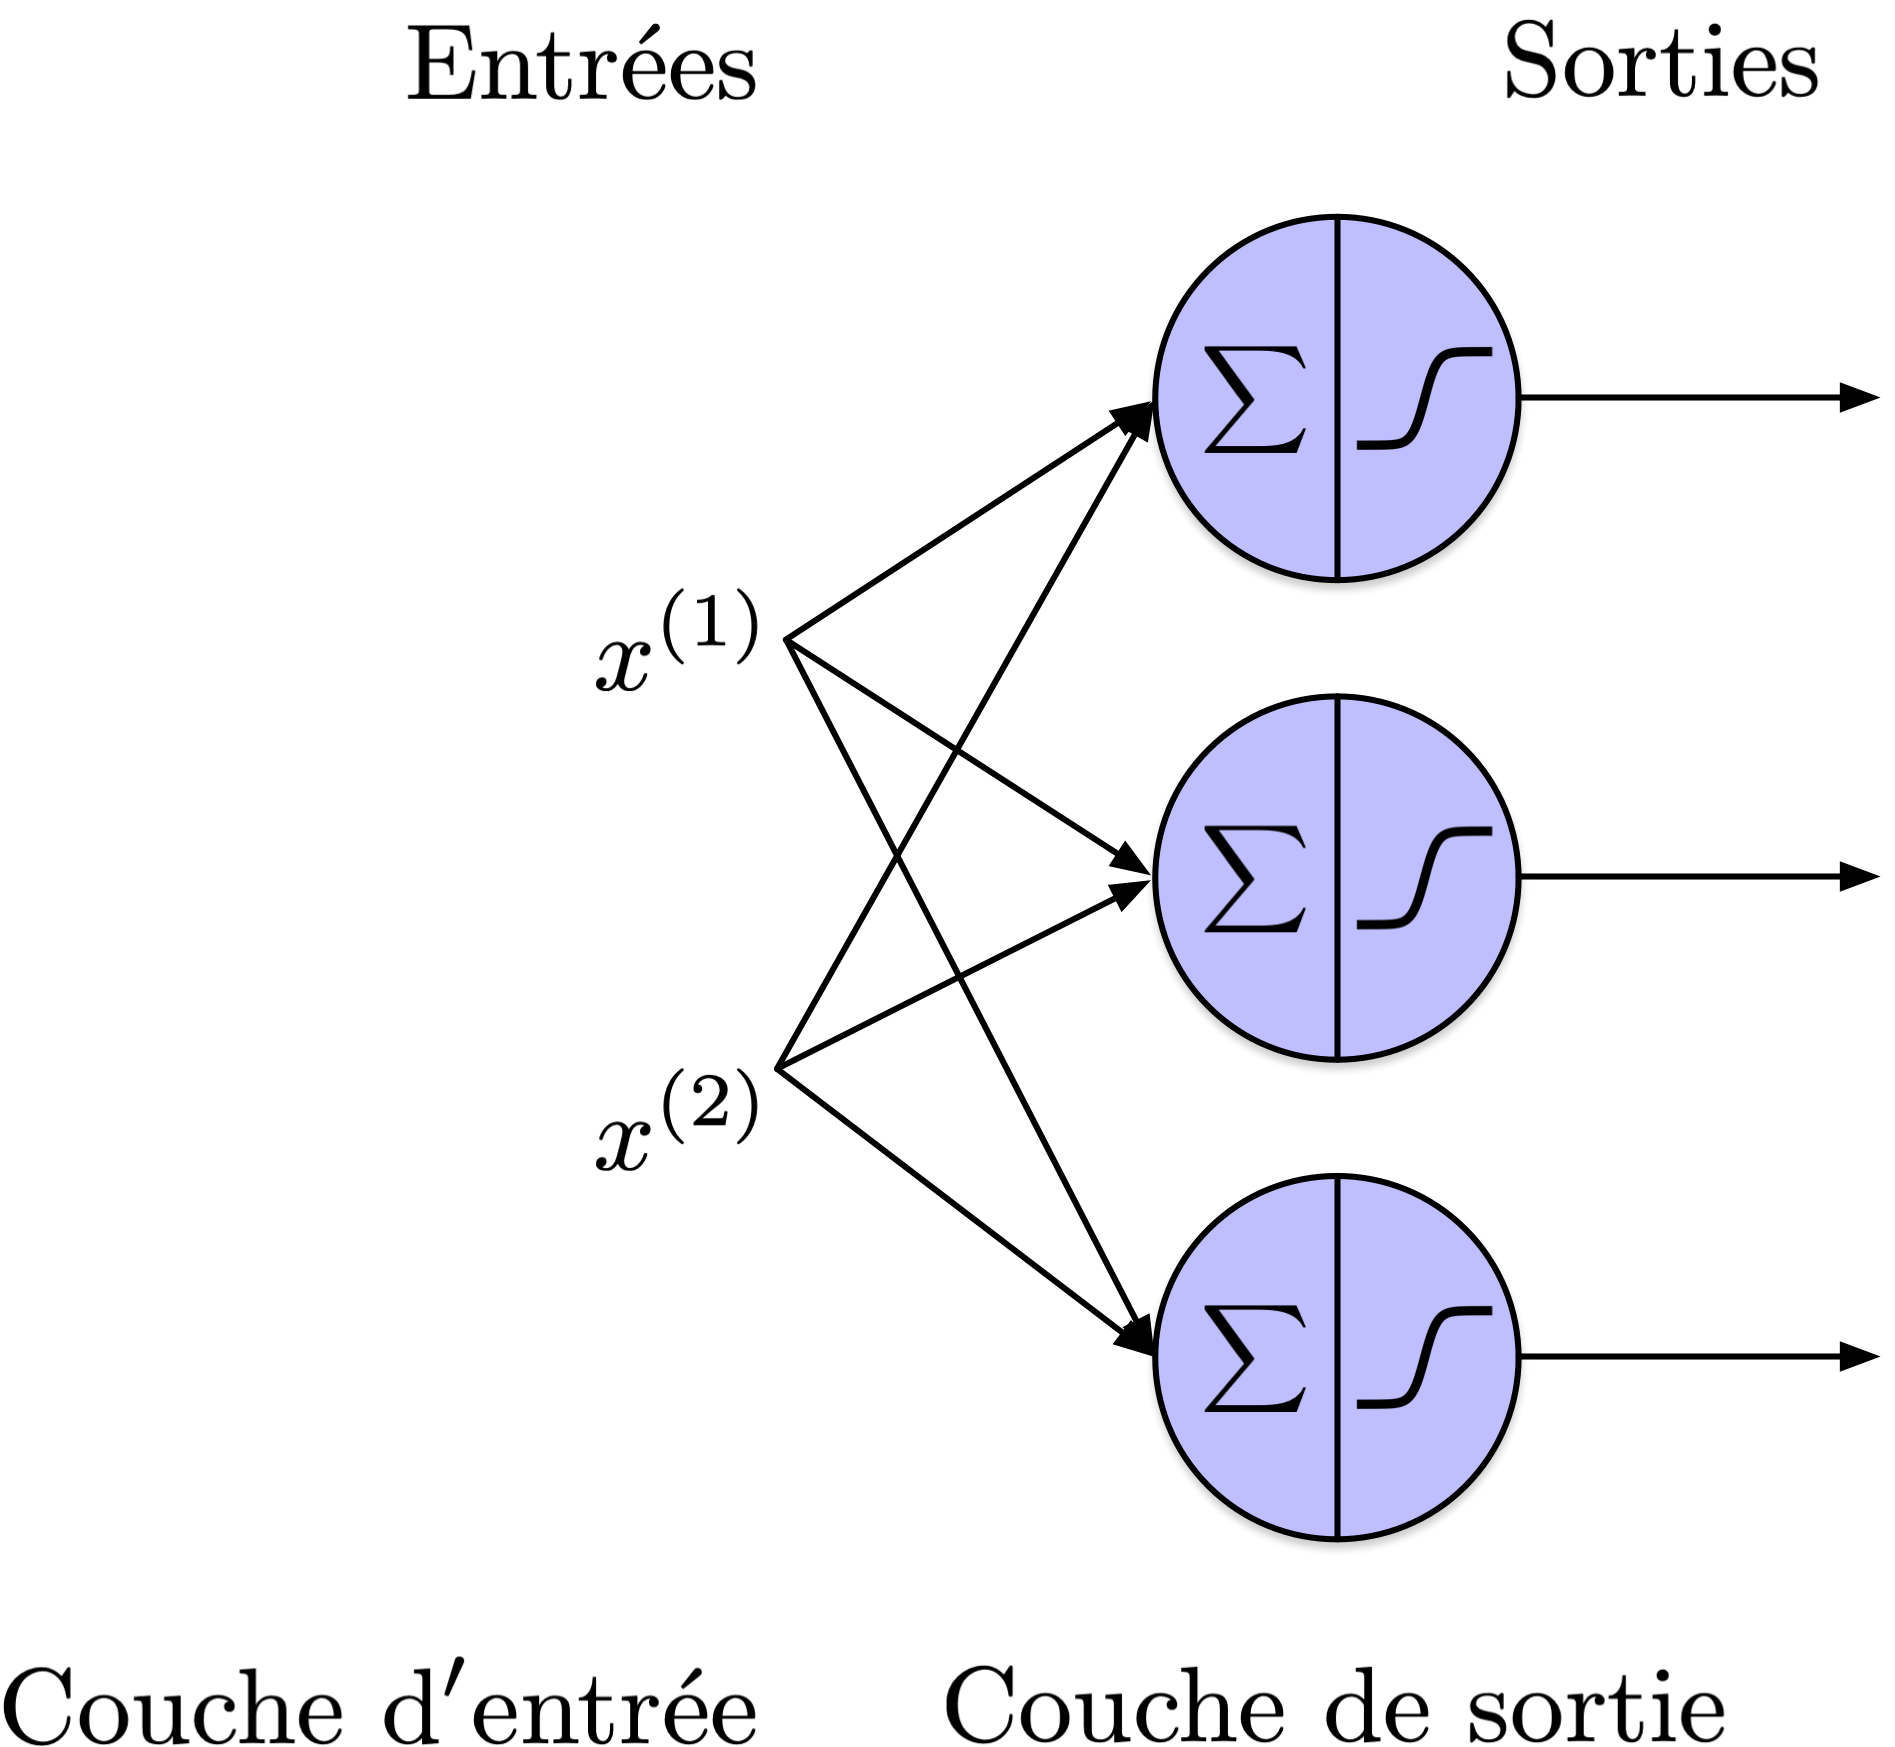

Comme ce perceptron génère plusieurs sorties simultanément, il effectue
des **prédictions binaires multiples**, ce qui en fait un
**classificateur multilabel** (peut aussi être utilisé comme
classificateur multiclass).

Les tâches de classification peuvent être divisées en **classification
multilabel** et **classification multiclass**.

1.  **Classification multiclass :**

    -   Dans la classification multiclass, chaque instance est assignée
        à une seule classe parmi trois ou plus classes possibles. Les
        classes sont mutuellement exclusives, ce qui signifie qu’une
        instance ne peut pas appartenir à plusieurs classes en même
        temps.

    -   **Exemple :** Classer une image comme étant soit un chat, un
        chien, ou un oiseau. Chaque image appartient à une seule de ces
        catégories.

2.  **Classification multilabel :**

    -   Dans la classification multilabel, chaque instance peut être
        associée à plusieurs classes simultanément. Les classes ne sont
        pas mutuellement exclusives, permettant ainsi qu’une instance
        appartienne à plusieurs classes à la fois.

    -   **Exemple :** Attribuer des balises à une image telles que
        “extérieur”, “coucher de soleil”, et “plage”. L’image peut
        appartenir simultanément à toutes ces étiquettes.

La différence clé réside dans la relation entre les classes : **la
classification multiclass traite d’une seule étiquette par instance**,
tandis que **la classification multilabel gère plusieurs étiquettes pour
chaque instance**.

## Notation

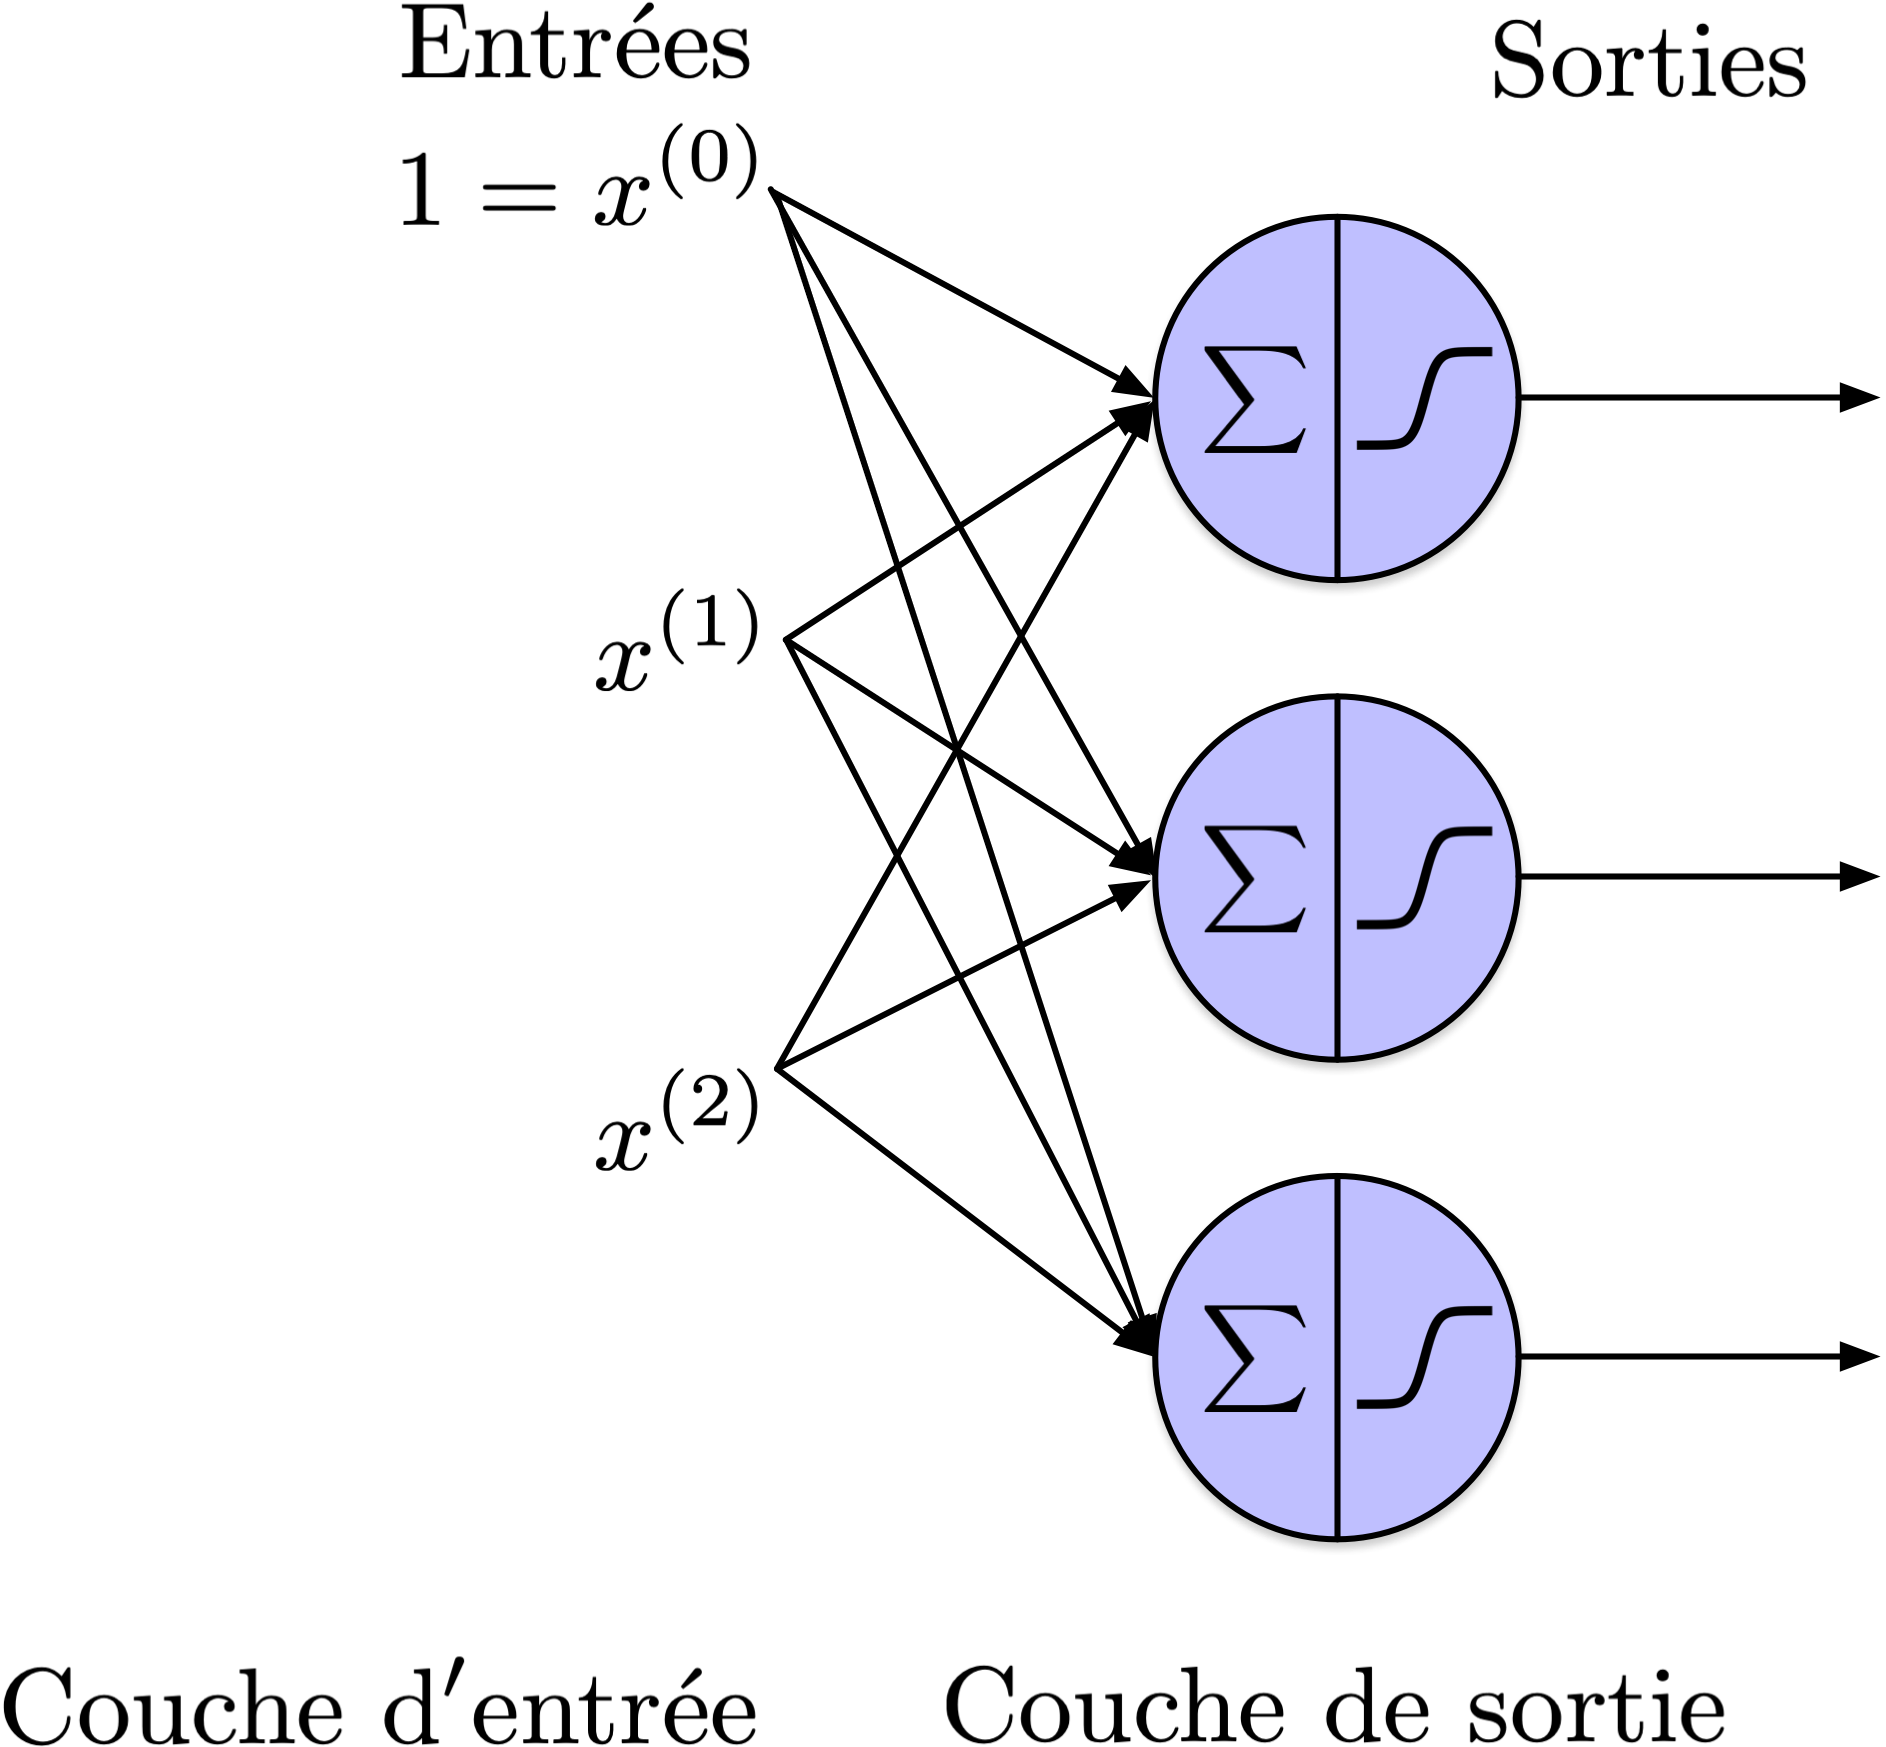

Comme précédemment, introduisez un attribut supplémentaire avec une
valeur de 1 à l’entrée. **Attribuez un biais $b$ à chaque neurone.**
Chaque connexion entrante a **implicitement** un poids associé.

## Notation

-   $X$ est la **matrice de données d’entrée** où **chaque ligne
    correspond à un exemple** et **chaque colonne représente l’un des
    $D$ attributs**.

-   $W$ est la **matrice de poids**, structurée avec une **ligne par
    entrée (attribut)** et une **colonne par neurone**.

-   Les **termes de biais** peuvent être représentés séparément ; les
    deux approches apparaissent dans la littérature. Ici, $b$ est un
    vecteur de **longueur égale au nombre de neurones**.

Avec les réseaux neuronaux, les **paramètres** du modèle sont souvent
désignés par $w$ (vecteur) ou $W$ (matrice), plutôt que par $\theta$.

## Discussion

-   L’algorithme pour **entraîner** le perceptron ressemble étroitement
    à la descente de gradient stochastique.

    -   Dans l’**intérêt du temps** et pour **éviter la confusion**,
        nous passerons cet algorithme et nous nous concentrerons sur le
        **perceptron multicouche** (MLP) et son algorithme
        d’entraînement, le **backpropagation**.

## Note historique et justification

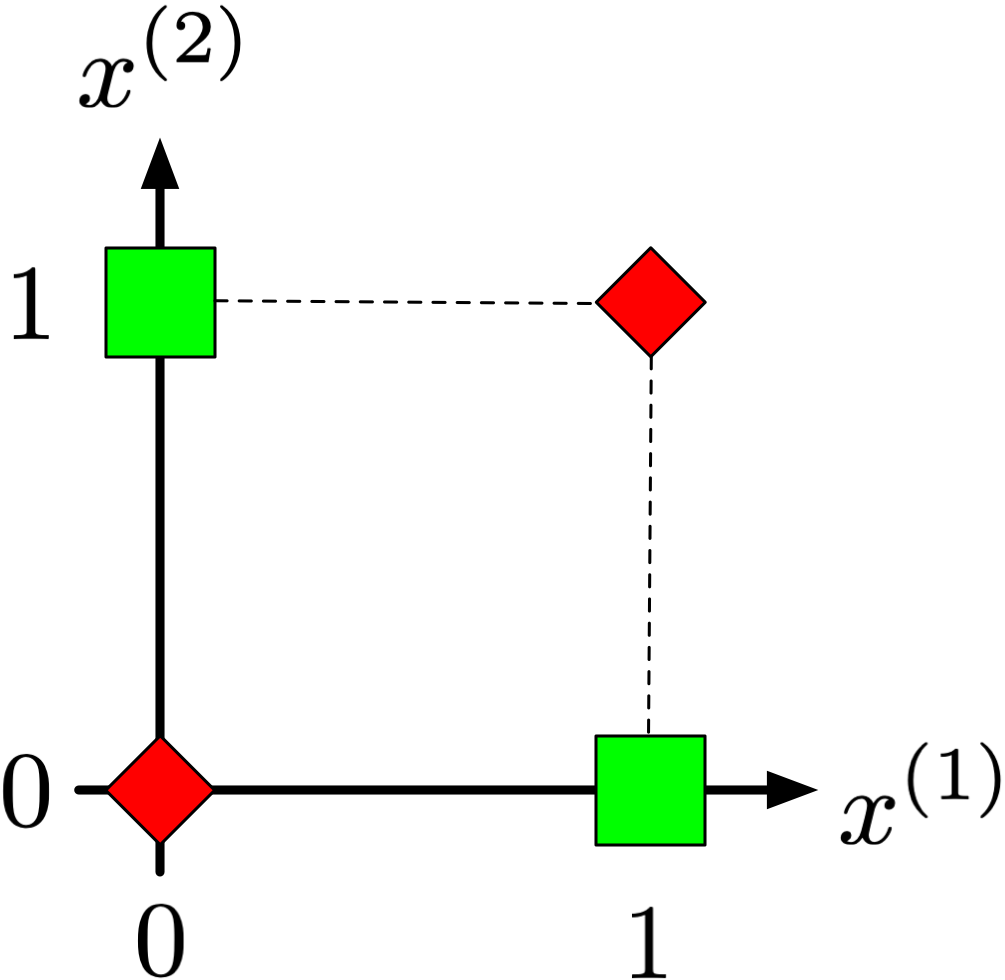

Minsky et Papert (1969) a démontré les limites des perceptrons,
notamment leur incapacité à résoudre les problèmes de classification
**OU exclusif** (XOR) :
${([0,1],\mathrm{true}), ([1,0],\mathrm{true}), ([0,0],\mathrm{false}), ([1,1],\mathrm{false})}$.

Cette limitation s’applique également à d’autres classificateurs
linéaires, tels que la régression logistique.

En conséquence, en raison de ces limitations et du manque d’applications
pratiques à l’époque, certains chercheurs ont abandonné les perceptrons.

## Perceptron multicouche (MLP)

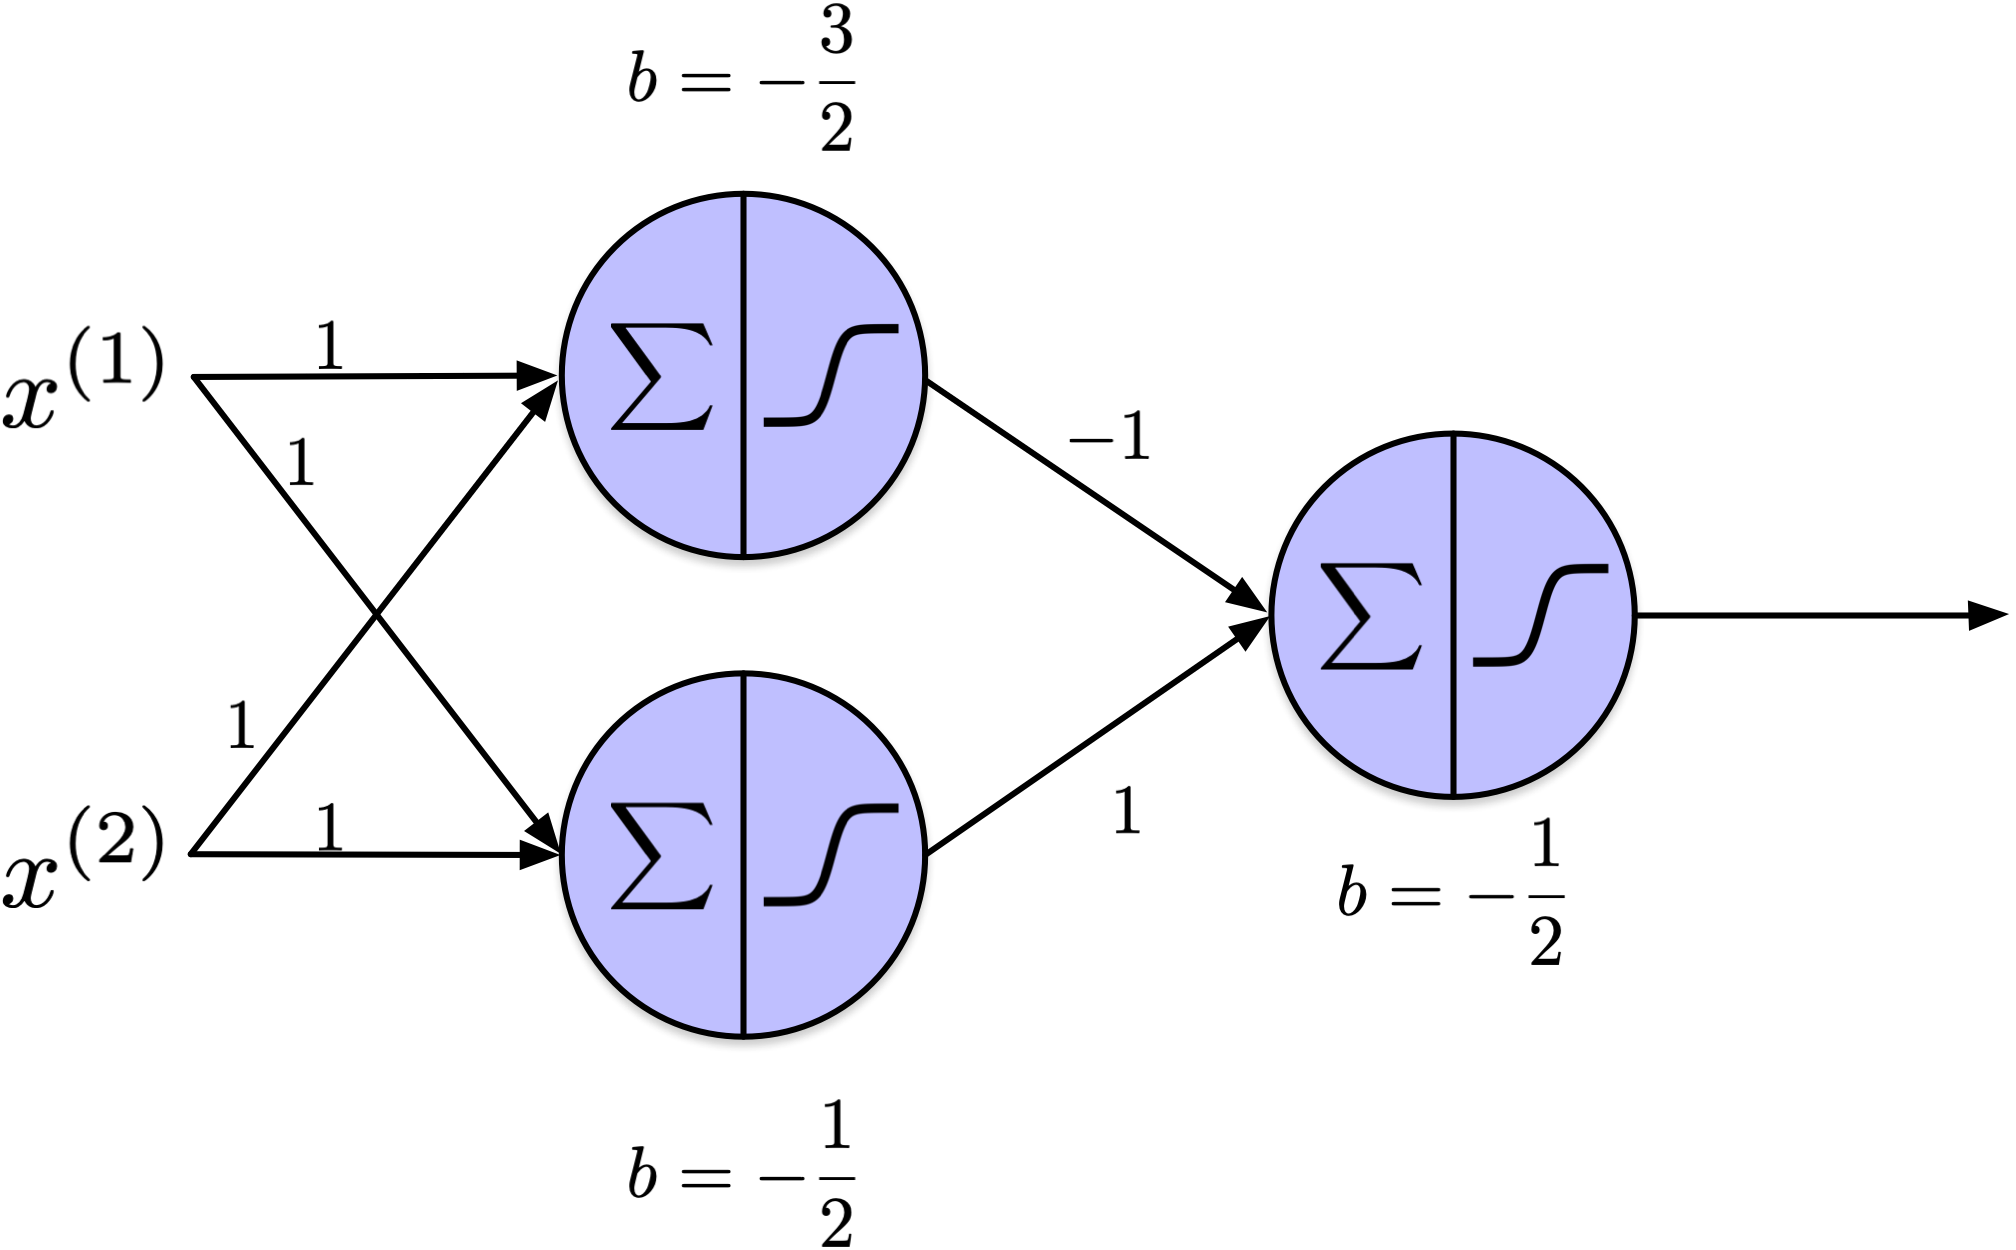

Un **perceptron multicouche** (MLP) inclut une couche d’entrée et une ou
plusieurs couches d’unités logiques à seuil. Les couches qui ne sont ni
d’entrée ni de sortie sont appelées **couches cachées**.

## Problème de classification XOR

| $x^{(1)}$ | $x^{(2)}$ | $y$ | $o_1$ | $o_2$ | $o_3$ |
|-----------|-----------|-----|-------|-------|-------|
| 1         | 0         | 1   | 0     | 1     | 1     |
| 0         | 1         | 1   | 0     | 1     | 1     |
| 0         | 0         | 0   | 0     | 0     | 0     |
| 1         | 1         | 0   | 1     | 1     | 0     |

$x^{(1)}$ et $x^{(2)}$ sont deux attributs, $y$ est la cible, $o_1$,
$o_2$, et $o_3 = h_\theta(x)$, sont les sorties des unités logiques à
seuil en haut à gauche, en bas à gauche, et à droite. Clairement,
$h_\theta(x) = y, \forall x \in X$. Le défi à l’époque de Rosenblatt
résidait dans l’absence d’algorithmes pour entraîner des réseaux à
couches multiples.

J’ai développé un tableur Excel pour vérifier que le perceptron
multicouche proposé résout effectivement le problème de classification
XOR.

La fonction de seuil utilisée dans ce modèle est la fonction de
Heaviside.

## Propagation avant (FNN)

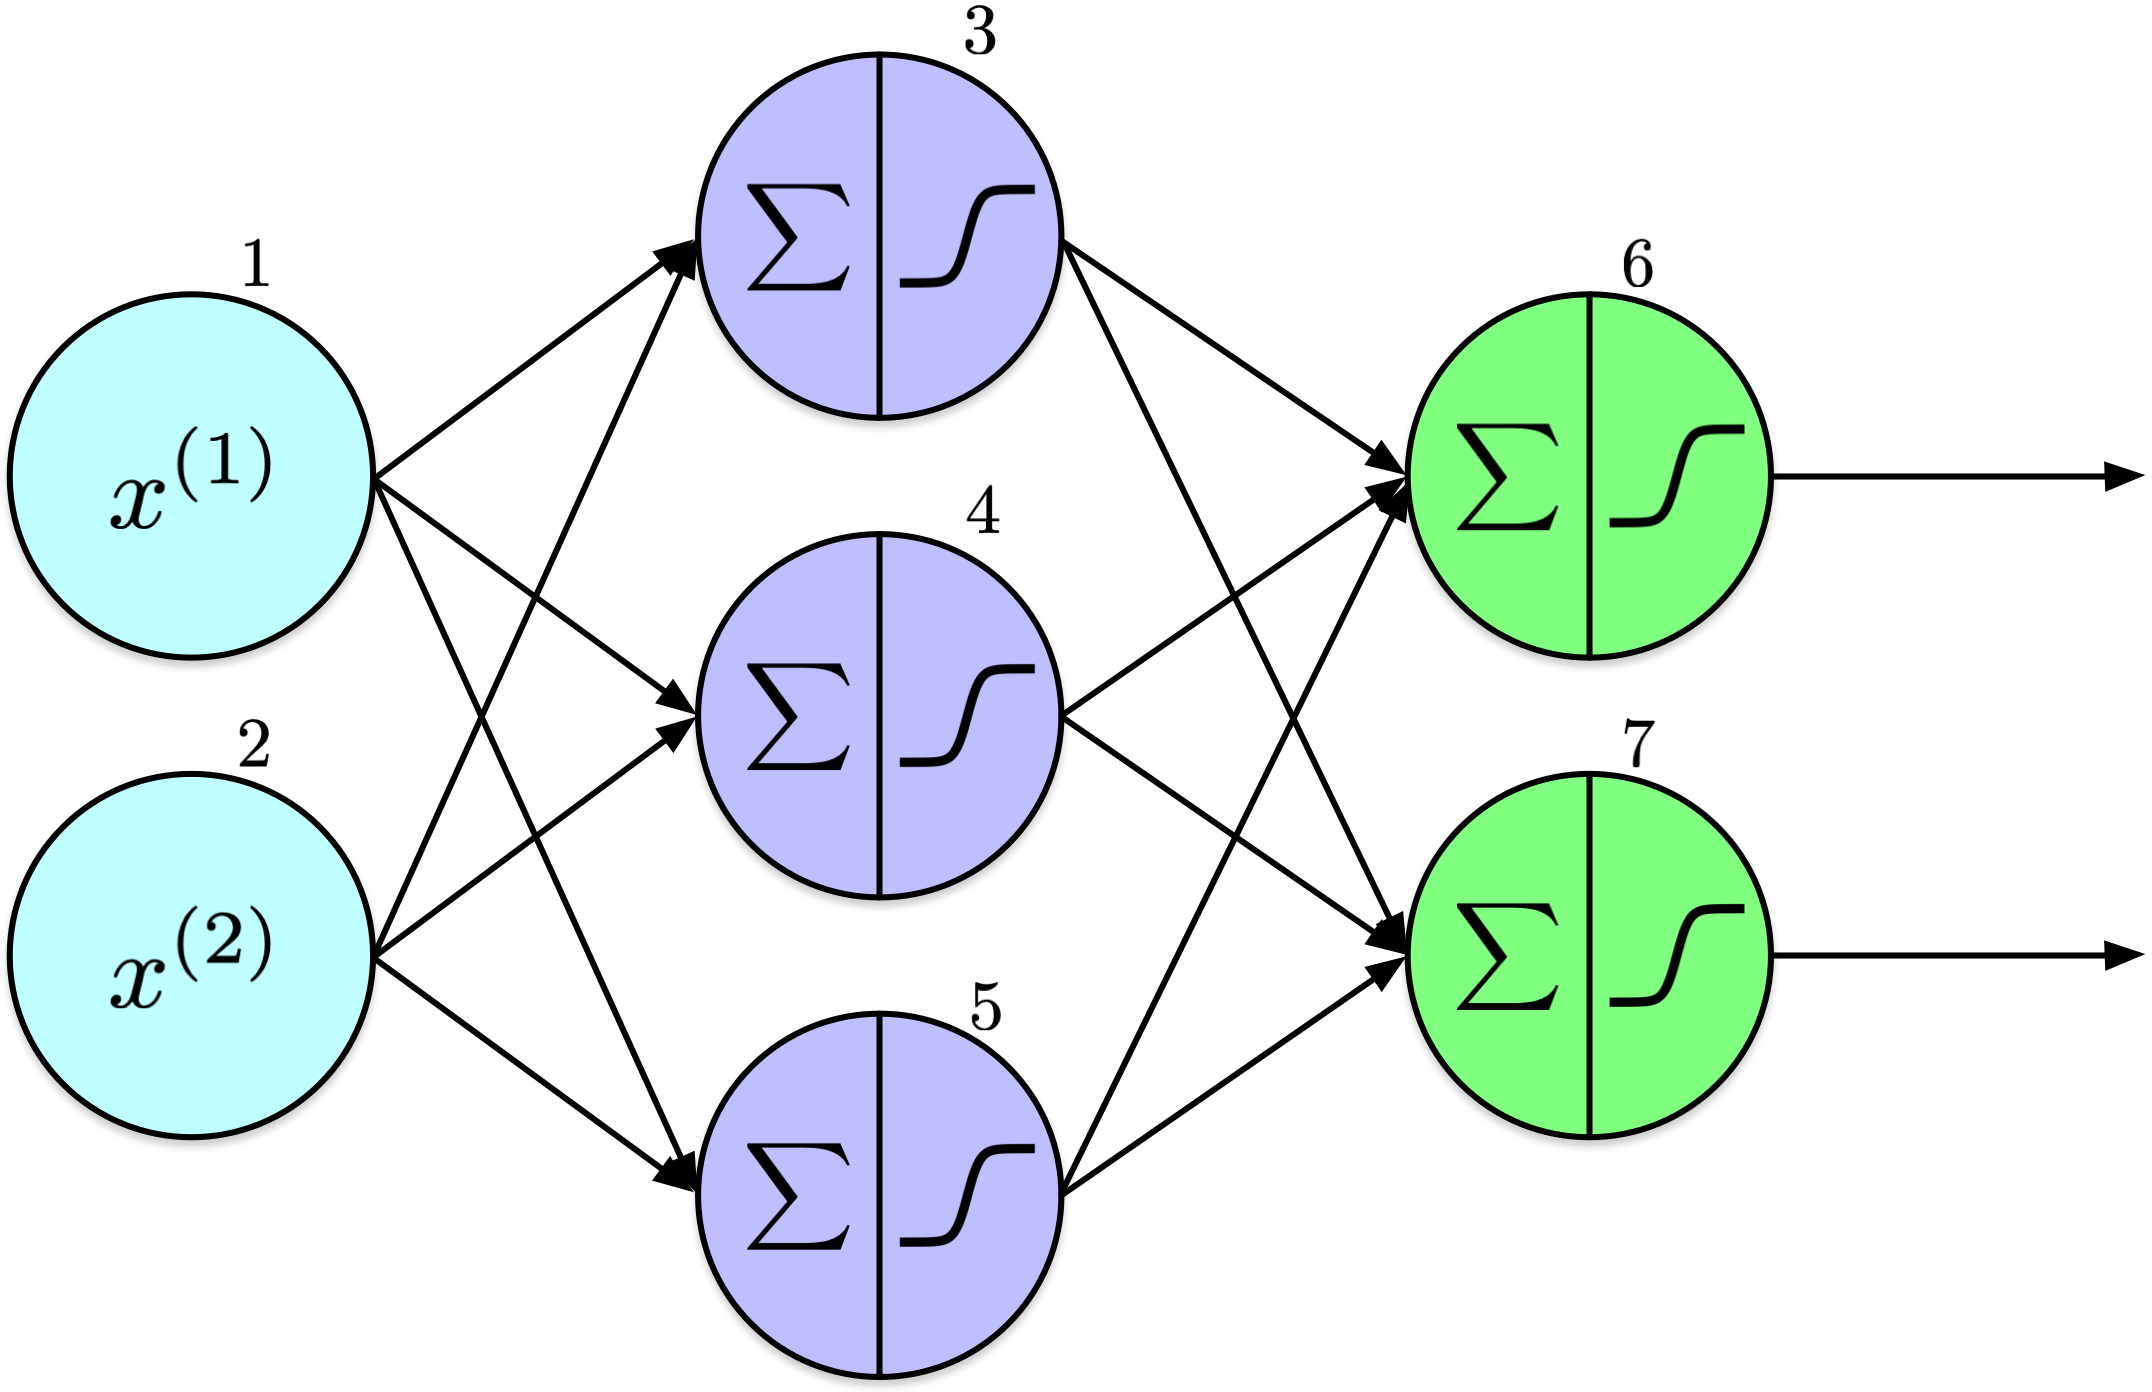

Dans cette architecture, l’information circule dans une seule direction
— de gauche à droite, passant de l’entrée à la sortie. Cela lui vaut le
nom de **réseau de neurones à propagation avant** (*feedforward network*
– FNN).

Le réseau est constitué de **trois couches** : d’entrée, cachée et de
sortie. La **couche d’entrée** contient deux nœuds, la **couche cachée**
comprend trois nœuds, et la **couche de sortie** a deux nœuds. Des
couches cachées supplémentaires et des nœuds par couche peuvent être
ajoutés, ce qui sera discuté plus tard.

Il est souvent utile d’inclure des nœuds d’entrée explicites qui ne
réalisent aucun calcul, appelés **unités d’entrée** ou **neurones
d’entrée**. Ces nœuds agissent comme des espaces réservés pour
introduire des attributs d’entrée dans le réseau, transmettant les
données directement à la couche suivante sans transformation. Dans le
diagramme du réseau, ce sont les nœuds bleu clair à gauche, étiquetés 1
et 2. Typiquement, **le nombre d’unités d’entrée correspond au nombre
d’attributs**.

Pour plus de clarté, les nœuds sont étiquetés pour faciliter la
discussion des poids entre eux, tels que $w_{1,5}$ entre les nœuds 1 et
5. De même, la sortie d’un nœud est désignée par $o_k$, où $k$
représente l’étiquette du nœud. Par exemple, pour $k=3$, la sortie
serait $o_3$.

## Propagation avant (Calcul)

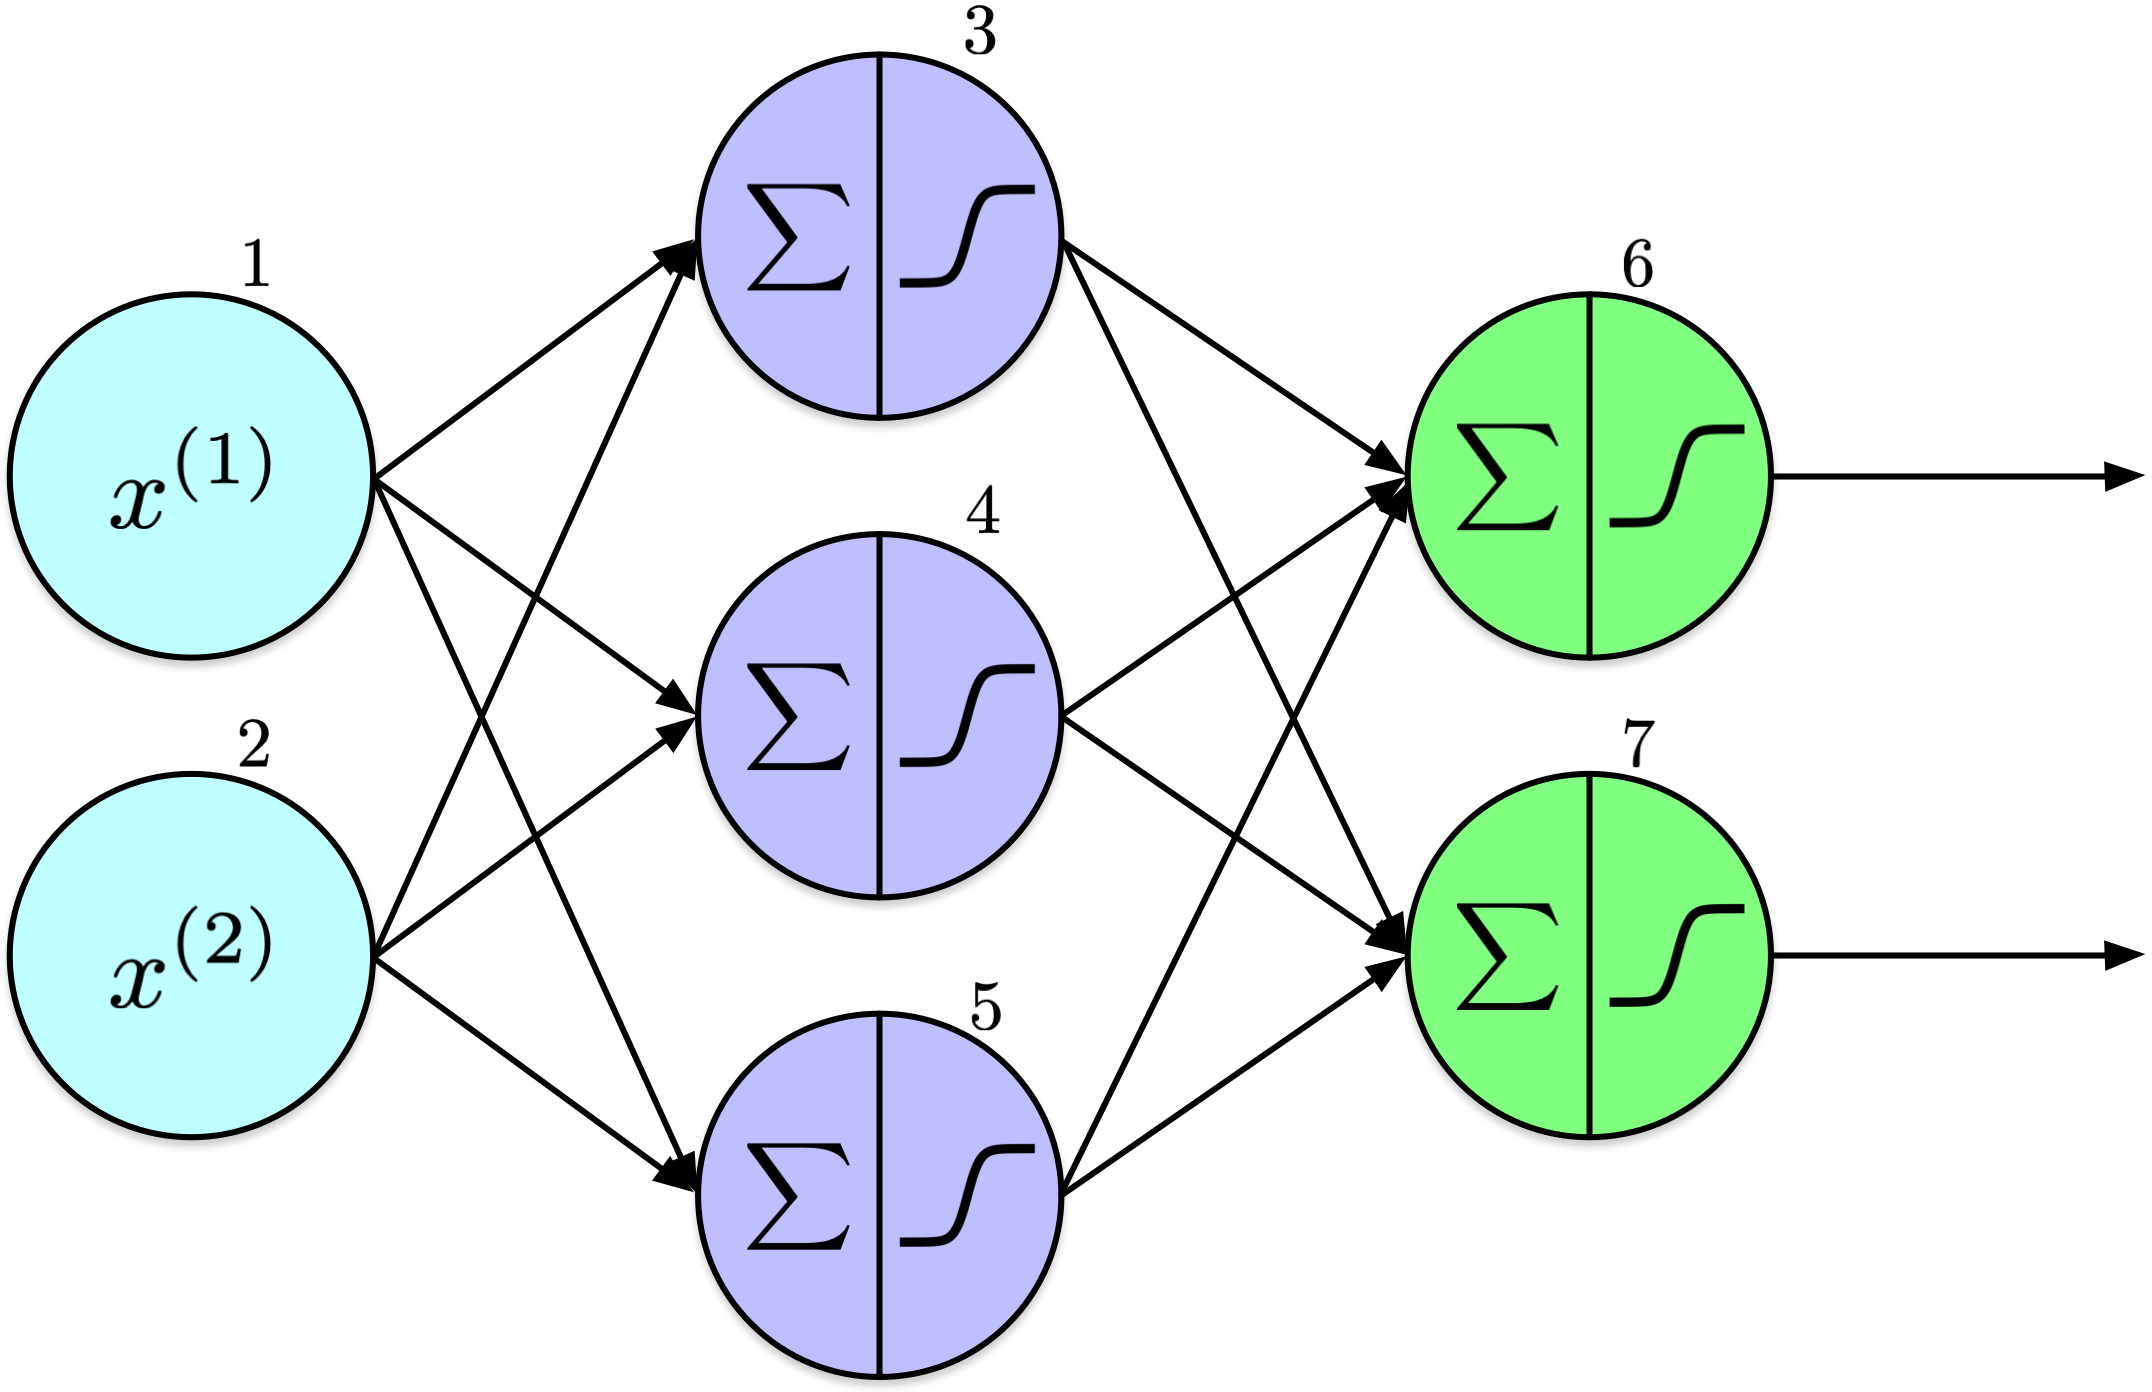

$o_3 = \sigma(w_{13} x^{(1)}+ w_{23} x^{(2)} + b_3)$

$o_4 = \sigma(w_{14} x^{(1)}+ w_{24} x^{(2)} + b_4)$

$o_5 = \sigma(w_{15} x^{(1)}+ w_{25} x^{(2)} + b_5)$

$o_6 = \sigma(w_{36} o_3 + w_{46} o_4 + w_{56} o_5 + b_6)$

$o_7 = \sigma(w_{37} o_3 + w_{47} o_4 + w_{57} o_5 + b_7)$

Il est important de **comprendre le flux d’information** : ce réseau
**calcule** deux sorties à partir de ses entrées.

Pour simplifier la figure, j’ai choisi de ne pas afficher les termes de
biais, bien qu’ils restent des composants cruciaux. Plus précisément,
$b_3$ représente le terme de biais associé au nœud 3.

Si les termes de biais n’étaient pas significatifs, le processus
d’entraînement les réduirait naturellement à zéro. Les termes de biais
sont essentiels car ils permettent d’ajuster la frontière de décision,
permettant ainsi au modèle d’apprendre des schémas plus complexes que
les poids seuls ne peuvent capturer. En offrant des degrés de liberté
supplémentaires, ils contribuent également à une convergence plus rapide
pendant l’entraînement.

## Propagation avant (Calcul)

In [1]:
import numpy as np

# Fonction sigmoïde

def sigma(x):
    return 1 / (1 + np.exp(-x))

# Vecteur d'entrée (deux attributs), un exemple de notre ensemble d'entraînement

x1, x2 = (0.5, 0.9)

# Initialisation des poids des couches 2 et 3 à des valeurs aléatoires

w13, w14, w15, w23, w24, w25 = np.random.uniform(low=-1, high=1, size=6)
w36, w46, w56, w37, w47, w57 = np.random.uniform(low=-1, high=1, size=6)

# Initialisation des 5 termes de biais à des valeurs aléatoires

b3, b4, b5, b6, b7 = np.random.uniform(low=-1, high=1, size=5)

o3 = sigma(w13 * x1 + w23 * x2 + b3)
o4 = sigma(w14 * x1 + w24 * x2 + b4)
o5 = sigma(w15 * x1 + w25 * x2 + b5)
o6 = sigma(w36 * o3 + w46 * o4 + w56 * o5 + b6)
o7 = sigma(w37 * o3 + w47 * o4 + w57 * o5 + b7)

(o6, o7)

(0.5829818217937393, 0.6097714425108673)

L’exemple ci-dessus illustre le processus de calcul avec des valeurs
spécifiques. Avant d’entraîner un réseau de neurones, il est courant
d’initialiser les poids et les biais avec des valeurs aléatoires. La
descente de gradient est ensuite utilisée pour ajuster itérativement ces
paramètres afin de minimiser la fonction de perte.

## Propagation avant (Calcul)

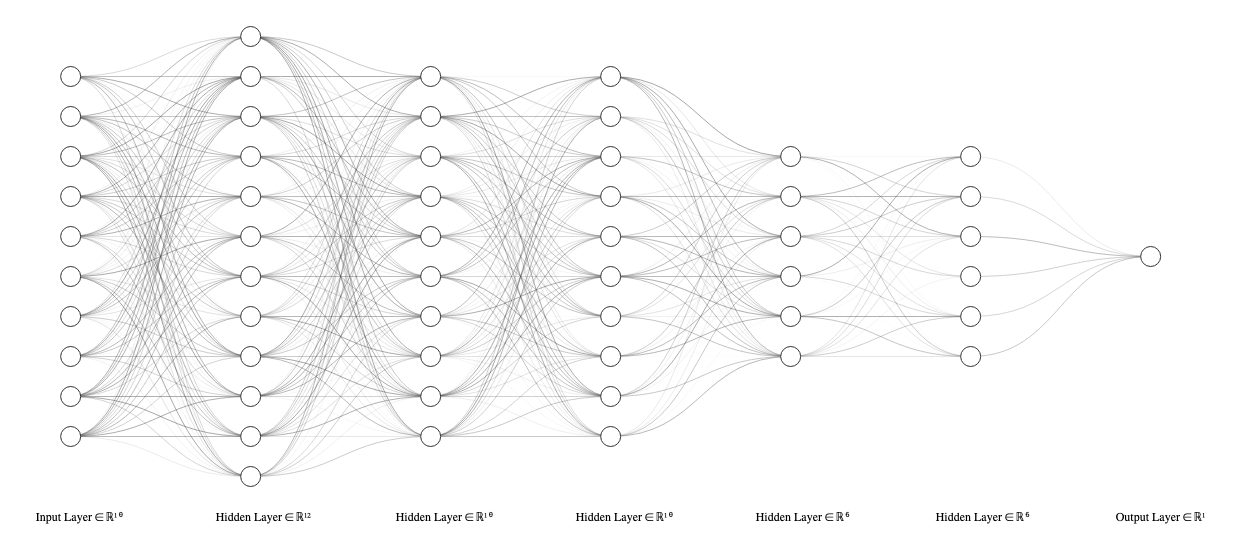

Le flux d’information reste cohérent même dans des réseaux plus
**complexes**. Les réseaux avec de nombreuses couches sont appelés
**réseaux de neurones profonds** (DNN).

Produit avec **NN-SVG**, LeNail (2019).

## Propagation avant (Calcul)

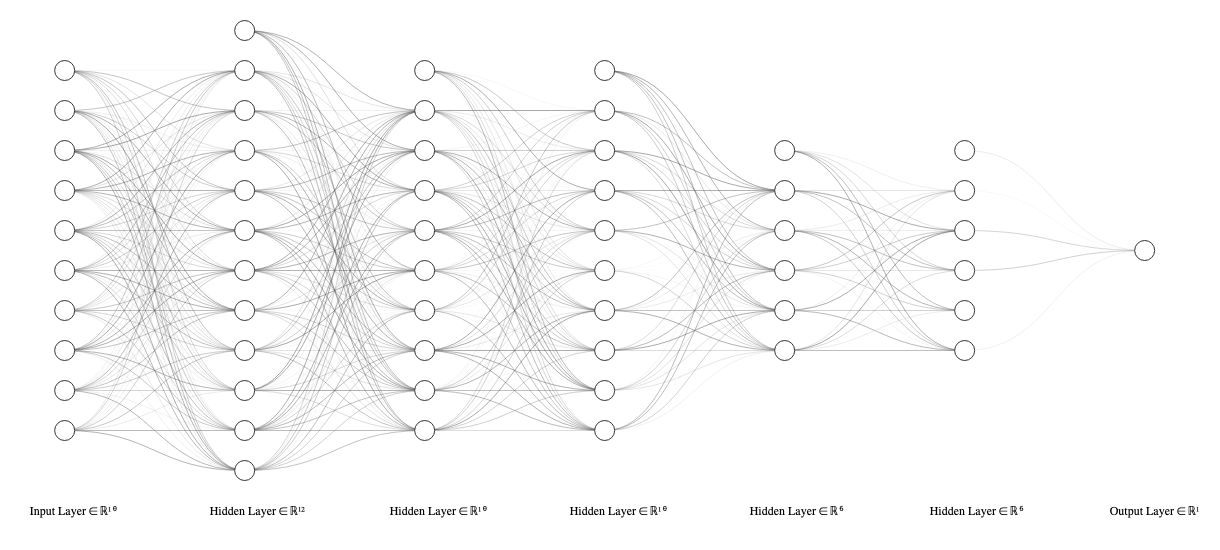

Même réseau avec **termes de biais montrés**.

Produit avec **NN-SVG**, LeNail (2019).

## Fonction d’activation

-   Comme discuté plus tard, l’algorithme d’entraînement, appelé
    **rétropropagation** (*backpropagation*), utilise **la descente de
    gradient**, nécessitant le calcul des **dérivées partielles de la
    fonction de perte**.

-   La **fonction de seuil** dans le perceptron multicouche a dû être
    remplacée, car elle consiste uniquement en des surfaces plates. **La
    descente de gradient ne peut pas progresser sur des surfaces planes
    en raison de leur dérivée nulle**.

## Fonction d’activation

-   **Les fonctions d’activation non linéaires sont primordiales** car,
    sans elles, plusieurs couches du réseau ne calculeraient qu’une
    fonction linéaire des entrées.

-   Selon le **théorème d’approximation universelle**, des réseaux
    profonds suffisamment grands avec des fonctions d’activation non
    linéaires peuvent **approximer n’importe quelle fonction continue**.
    Voir [Théorème d’Approximation
    Universelle](https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_d%27approximation_universelle).

## Sigmoïde

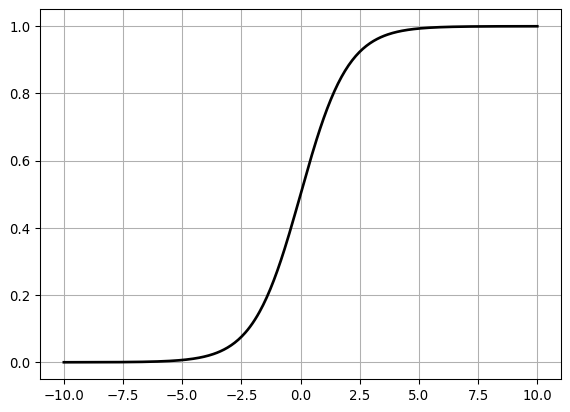

$$
\sigma(t) = \frac{1}{1 + e^{-t}}
$$

## Fonction tangente hyperbolique

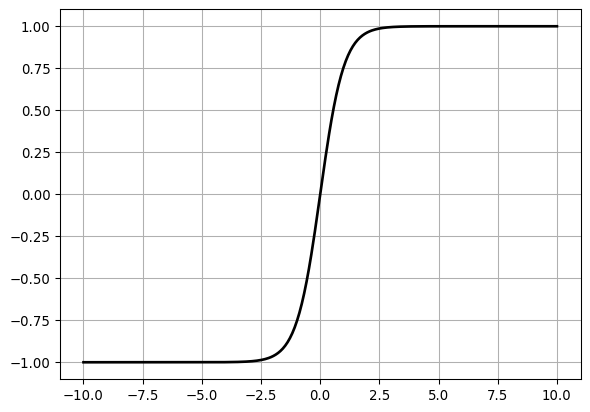

$$
\tanh(t) = 2 \sigma(2t) - 1
$$

Cette courbe en forme de S, semblable à la fonction sigmoïde, produit
des valeurs de sortie allant de -1 à 1. Selon Géron (2022), cette plage
permet à la sortie de chaque couche d’être approximativement centrée
autour de 0 au début de l’entraînement, accélérant ainsi la convergence.

## Fonction unitaire rectifiée (ReLU)

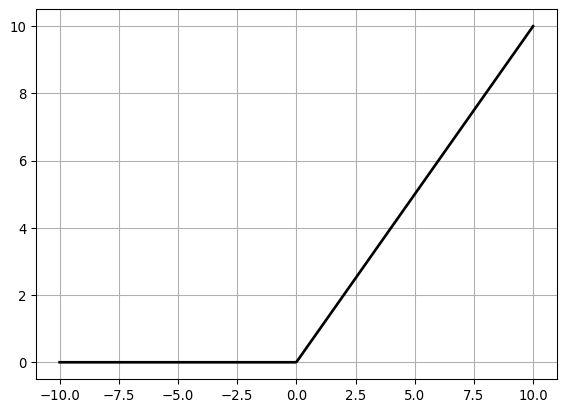

$$
\mathrm{ReLU}(t) = \max(0, t)
$$

Bien que la **fonction ReLU** ne soit pas différentiable en $t=0$ et
qu’elle ait une dérivée nulle pour $t<0$, elle fonctionne
remarquablement bien en pratique et est très efficace d’un point de vue
computationnel. Par conséquent, elle est devenue la **fonction
d’activation par défaut**.

## Fonctions d’activation courantes

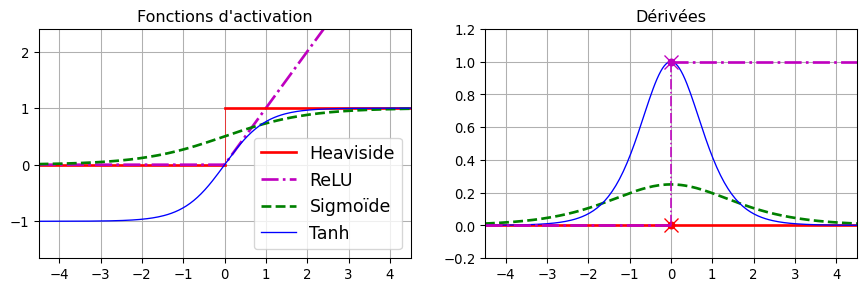

Géron (2022) –
[10_neural_nets_with_keras.ipynb](https://github.com/ageron/handson-ml3/blob/main/10_neural_nets_with_keras.ipynb)

# Approximation Universelle

## Définition

Le **théorème d’approximation universelle** affirme qu’un réseau de
neurones *feedforward* avec une seule couche cachée contenant un nombre
fini de neurones peut **approcher n’importe quelle fonction continue**
sur un sous-ensemble compact de $\mathbb{R}^n$, avec des poids et des
fonctions d’activation appropriés.

Cybenko (1989); Hornik, Stinchcombe, et White (1989)

En termes mathématiques, un sous-ensemble de $\mathbb{R}^n$ est
considéré comme **compact** s’il est à la fois **fermé** et **borné**.

-   **Fermé** : Un ensemble est fermé s’il contient tous ses points
    limites. En d’autres termes, il inclut ses points d’accumulation.

-   **Borné** : Un ensemble est borné s’il existe un nombre réel $M$ tel
    que la distance entre deux points quelconques de l’ensemble soit
    inférieure à $M$.

Dans le contexte du théorème d’approximation universelle, la compacité
garantit que la fonction à approximer est définie sur une région finie
et bien comportée, ce qui est crucial pour les garanties théoriques
fournies par le théorème.

## Démonstration par le code

In [6]:
import numpy as np

# Définition de la fonction à approximer

def f(x):
    return 2 * x**3 + 4 * x**2 - 5 * x + 1

# Génération d'un jeu de données, x dans [-4,2), f(x) comme ci-dessus

X = 6 * np.random.rand(1000, 1) - 4

y = f(X.flatten())

## Augmenter le nombre de neurones

In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)

models = []

sizes = [1, 2, 5, 10, 100]

for i, n in enumerate(sizes):

    models.append(MLPRegressor(hidden_layer_sizes=[n], max_iter=5000, random_state=42))

    models[i].fit(X_train, y_train)

[MLPRegressor](https://scikit-learn.org/dev/modules/generated/sklearn.neural_network.MLPRegressor.html)
est un régresseur perceptron multicouche de sklearn. Sa fonction
d’activation par défaut est `relu`.

## Augmenter le nombre de neurones

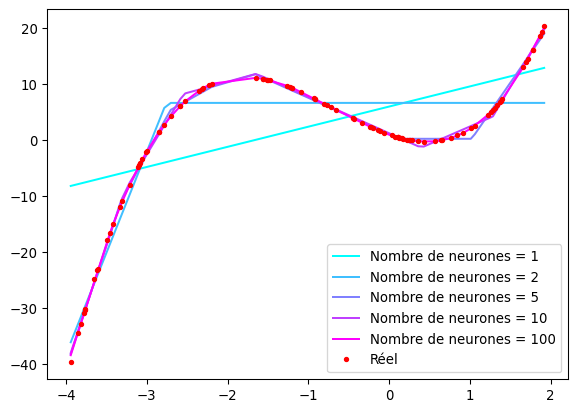

Dans l’exemple ci-dessus, j’ai conservé seulement 10% des données comme
ensemble de test car la fonction à approximer est simple et sans bruit.
Cette décision a été prise pour s’assurer que la courbe réelle ne masque
pas les autres résultats.

## Augmenter le nombre de neurones

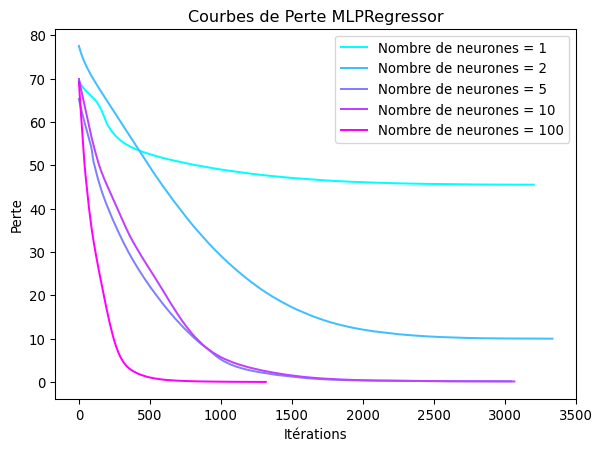

Comme prévu, augmenter le nombre de neurones réduit la perte.

# Codons

## Bibliothèques

[PyTorch](https://pytorch.org/) et
[TensorFlow](https://www.tensorflow.org/) sont les plateformes
dominantes pour l’apprentissage profond.

-   PyTorch a gagné beaucoup de traction dans la **communauté de
    recherche**. Initialement développé par **Meta AI**, il fait
    maintenant partie de la Linux Foundation.

-   TensorFlow, créé par **Google**, est largement adopté dans
    l’**industrie** pour déployer des modèles en production.

## Keras

[Keras](https://keras.io/) est une API de haut niveau conçue pour
construire, entraîner, évaluer et exécuter des modèles sur diverses
plateformes, y compris PyTorch, TensorFlow et
[JAX](https://jax.readthedocs.io/en/latest/quickstart.html), la
plateforme haute performance de Google.

[Keras](https://keras.io/) est suffisamment puissant pour la plupart des
projets.

Comme mentionné dans des citations du jour précédentes, François
Chollet, un ingénieur chez Google, est l’initiateur et l’un des
principaux développeurs du projet Keras.

## Dataset Fashion-MNIST

“[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) est
un ensemble de données d’images d’articles de
[Zalando](https://en.zalando.de/?_rfl=de) — comprenant un ensemble
d’entraînement de **60 000 exemples** et un ensemble de test de **10 000
exemples**. Chaque exemple est une **image en niveaux de gris de
28x28**, associée à une étiquette provenant de **10 classes**.”

**Attribution :** Géron (2022) –
[10_neural_nets_with_keras.ipynb](https://github.com/ageron/handson-ml3/blob/main/10_neural_nets_with_keras.ipynb)

## Chargement

In [10]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

Mise de côté de 5000 exemples pour constituer un ensemble de validation.

## Exploration

In [11]:
X_train.shape

(55000, 28, 28)

. . .

Transformer les intensités des pixels d’entiers dans la plage de 0 à 255
en flottants dans la plage de 0 à 1.

In [12]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

## À quoi ressemblent ces images ?

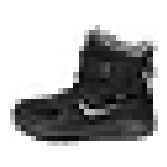

In [13]:
plt.figure(figsize=(2, 2))
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

. . .

In [14]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

. . .

Puisque les étiquettes sont des entiers de 0 à 9, les noms des classes
seront utiles.

In [15]:
class_names = ["T-shirt/top", "Pantalon", "Pull", "Robe", "Manteau",
               "Sandale", "Chemise", "Basket", "Sac", "Botte"]

## Les 40 premières images

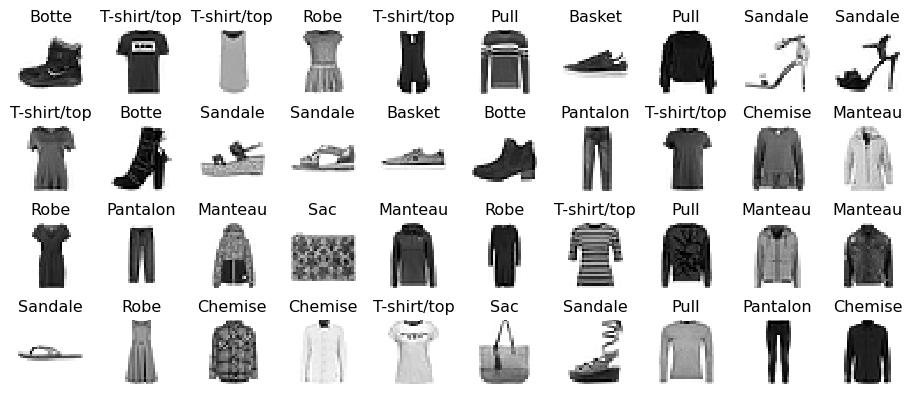

In [16]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Création d’un modèle

In [17]:
tf.random.set_seed(42)

model = tf.keras.Sequential()

model.add(tf.keras.layers.InputLayer(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

## `model.summary()`

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type) ┃ Output Shape ┃ Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 ( Flatten ) │ ( None , 784 ) │ 0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 ( Dense ) │ ( None , 300 ) │ 235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 ( Dense ) │ ( None , 100 ) │ 30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 ( Dense ) │ ( None , 10 ) │ 1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

Total params: 266,610 (1.02 MB)

Trainable params: 266,610 (1.02 MB)

Non-trainable params: 0 (0.00 B)

Comme observé, `dense_3` possède $235,500$ paramètres, tandis que
$784 \times 300 = 235,200$.

Pouvez-vous expliquer l’origine des paramètres supplémentaires ?

De même, `dense_3` a $30,100$ paramètres, tandis que
$300 \times 100 = 30,000$.

Pouvez-vous expliquer pourquoi ?

## Création d’un modèle (alternative)

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

/Users/turcotte/opt/micromamba/envs/teaching/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


## `model.summary()`

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type) ┃ Output Shape ┃ Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten ( Flatten ) │ ( None , 784 ) │ 0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense ( Dense ) │ ( None , 300 ) │ 235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 ( Dense ) │ ( None , 100 ) │ 30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 ( Dense ) │ ( None , 10 ) │ 1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

Total params: 266,610 (1.02 MB)

Trainable params: 266,610 (1.02 MB)

Non-trainable params: 0 (0.00 B)

## Compilation du modèle

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

`sparse_categorical_crossentropy` est la fonction de perte appropriée
pour un problème de classification multiclasses (plus de détails à
venir).

La méthode `compile` permet de définir la fonction de perte, ainsi que
d’autres paramètres. Keras prépare ensuite le modèle pour
l’entraînement.

## Entraînement du modèle

In [23]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
   1/1719 ━━━━━━━━━━━━━━━━━━━━ 3:52 135ms/step - accuracy: 0.2500 - loss: 2.2728   2/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2266 - loss: 2.3037   3/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2031 - loss: 2.3180      69/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 781us/step - accuracy: 0.3440 - loss: 2.0419  70/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - accuracy: 0.3461 - loss: 2.0381 144/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.4363 - loss: 1.8207 145/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.4371 - loss: 1.8184 218/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - accuracy

Le modèle est entraîné avec un ensemble d’entraînement et un ensemble de
validation. À chaque étape, le modèle rapporte ses performances sur les
deux ensembles. Cela permet également de visualiser les courbes
d’exactitude et de perte sur les deux ensembles (plus de détails à
venir).

Lors de l’appel à la méthode `fit` dans Keras (ou des frameworks
similaires), chaque étape correspond à l’évaluation d’un mini-lot. Un
mini-lot est un sous-ensemble des données d’entraînement, et à chaque
étape, le modèle met à jour ses poids en fonction de l’erreur calculée à
partir de ce mini-lot.

Une époque est définie comme un passage complet sur l’ensemble des
données d’entraînement. Pendant une époque, le modèle traite plusieurs
mini-lots jusqu’à avoir vu toutes les données d’entraînement une fois.
Ce processus est répété sur un nombre spécifié d’époques pour optimiser
les performances du modèle.

## Visualisation

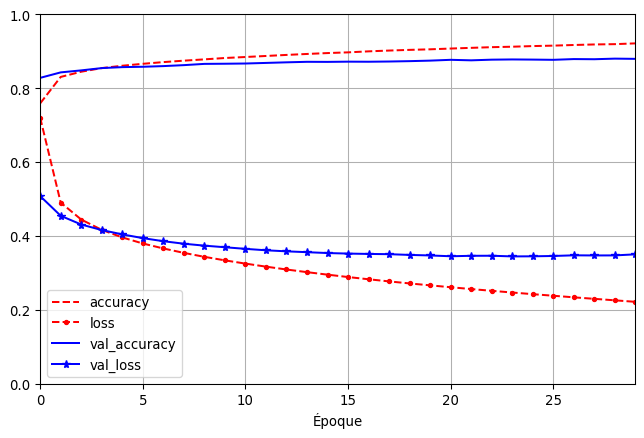

In [24]:
import pandas as pd 

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Époque",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # code supplémentaire
plt.show()

## Évaluation du modèle sur l’ensemble de test

In [25]:
model.evaluate(X_test, y_test)

  1/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9062 - loss: 0.3857  2/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9141 - loss: 0.3468  3/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9115 - loss: 0.3462 105/313 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.8882 - loss: 0.3444106/313 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.8881 - loss: 0.3448108/313 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.8879 - loss: 0.3448107/313 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.8880 - loss: 0.3447213/313 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.8802 - loss: 0.3585

[0.365256130695343, 0.8741000294685364]

## Faire des prédictions

In [26]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.18, 0.  , 0.01, 0.  , 0.8 ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

. . .

In [27]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

. . .

In [28]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Comme on peut le voir, les prédictions sont sans ambiguïté, avec une
seule classe par prédiction présentant une valeur élevée.

## Prédictions vs Observations

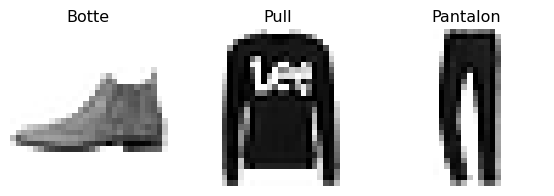

In [30]:
np.array(class_names)[y_pred]

array(['Botte', 'Pull', 'Pantalon'], dtype='<U11')

# Prologue

## Résumé

-   **Introduction aux réseaux de neurones et au connexionnisme**
    -   Passage de l’IA symbolique aux approches connexionnistes en
        intelligence artificielle.
    -   Inspiration des réseaux neuronaux biologiques et de la structure
        du cerveau humain.
-   **Calculs avec neurodes et unités logiques à seuil**
    -   Modèles précoces de neurones (neurodes) capables de réaliser des
        opérations logiques (ET, OU, NON).
    -   Limites des perceptrons simples dans la résolution de problèmes
        non linéairement séparables comme le XOR.
-   **Perceptrons multicouches (MLP) et réseaux de neurones à
    propagation avant (FNN)**
    -   Dépassement des limites des perceptrons en introduisant des
        couches cachées.
    -   Structure et flux d’information dans les réseaux de neurones à
        propagation avant.
    -   Explication des calculs de la passe avant dans les réseaux de
        neurones.
-   **Fonctions d’activation dans les réseaux de neurones**
    -   Importance des fonctions d’activation non linéaires (sigmoïde,
        tanh, ReLU) pour permettre l’apprentissage de motifs complexes.
    -   Rôle des fonctions d’activation dans la rétropropagation et
        l’optimisation par descente de gradient.
    -   Théorème de l’approximation universelle et ses implications pour
        les réseaux neuronaux.
-   **Frameworks d’apprentissage profond**
    -   Aperçu de PyTorch et TensorFlow en tant que plateformes leaders
        pour l’apprentissage profond.
    -   Introduction à Keras comme API de haut niveau pour la
        construction et l’entraînement des réseaux neuronaux.
    -   Discussion sur l’adaptabilité des différents frameworks à la
        recherche et aux applications industrielles.
-   **Implémentation pratique avec Keras**
    -   Chargement et exploration de l’ensemble de données
        Fashion-MNIST.
    -   Création d’un modèle de réseau neuronal avec l’API Sequential de
        Keras.
    -   Compilation du modèle avec des fonctions de perte et des
        optimiseurs appropriés pour la classification multiclasses.
    -   Entraînement du modèle et visualisation des métriques
        d’entraînement et de validation sur les époques.
-   **Évaluation des performances du modèle sur l’ensemble de test**
    -   Évaluation des performances du modèle sur l’ensemble de test
        Fashion-MNIST.
    -   Interprétation des résultats obtenus après l’entraînement.
-   **Faire des prédictions et interpréter les résultats**
    -   Utilisation du modèle entraîné pour faire des prédictions sur de
        nouvelles données.
    -   Visualisation des prédictions en parallèle avec les images et
        étiquettes réelles.
    -   Compréhension des probabilités de sortie et des assignations de
        classes dans le contexte de l’ensemble de données.

## Prochain cours

-   Nous allons introduire diverses architectures de réseaux de neurones
    artificiels.

## Références

Cybenko, George V. 1989. « Approximation by superpositions of a
sigmoidal function ». *Mathematics of Control, Signals and Systems* 2:
303‑14. <https://api.semanticscholar.org/CorpusID:3958369>.

Géron, Aurélien. 2022. *Hands-on Machine Learning with Scikit-Learn,
Keras, and TensorFlow*. 3ᵉ éd. O’Reilly Media, Inc.

Goodfellow, Ian, Yoshua Bengio, et Aaron Courville. 2016. *Deep
Learning*. Adaptive computation et machine learning. MIT Press.
<https://dblp.org/rec/books/daglib/0040158>.

Hornik, Kurt, Maxwell Stinchcombe, et Halbert White. 1989. « Multilayer
feedforward networks are universal approximators ». *Neural Networks* 2
(5): 359‑66.
https://doi.org/<https://doi.org/10.1016/0893-6080(89)90020-8>.

LeCun, Yann, Yoshua Bengio, et Geoffrey Hinton. 2015. « Deep learning ».
*Nature* 521 (7553): 436‑44. <https://doi.org/10.1038/nature14539>.

LeNail, Alexander. 2019. « NN-SVG: Publication-Ready Neural Network
Architecture Schematics ». *Journal of Open Source Software* 4 (33):
747. <https://doi.org/10.21105/joss.00747>.

McCulloch, Warren S, et Walter Pitts. 1943. « A logical calculus of the
ideas immanent in nervous activity ». *The Bulletin of Mathematical
Biophysics* 5 (4): 115‑33. <https://doi.org/10.1007/bf02478259>.

Minsky, Marvin, et Seymour Papert. 1969. *Perceptrons: An Introduction
to Computational Geometry*. Cambridge, MA, USA: MIT Press.

Rosenblatt, F. 1958. « The perceptron: A probabilistic model for
information storage and organization in the brain. » *Psychological
Review* 65 (6): 386‑408. <https://doi.org/10.1037/h0042519>.

Russell, Stuart, et Peter Norvig. 2020. *Artificial Intelligence: A
Modern Approach*. 4ᵉ éd. Pearson. <http://aima.cs.berkeley.edu/>.

------------------------------------------------------------------------

Marcel **Turcotte**

<Marcel.Turcotte@uOttawa.ca>

École de **science informatique** et de génie électrique (**SI**GE)

Université d’Ottawa